This notebook entails access to my Postgre SQL database, a datawarehouse where I store events from each match in La Liga. Scraped from whoscored through a dynamic webscraping method each week.

SQL + Python

#Requirements

In [ ]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import numpy as np
!pip install mplsoccer
from mplsoccer.pitch import Pitch, VerticalPitch
from scipy.ndimage import gaussian_filter
import datetime
from mplsoccer import FontManager
import matplotlib.font_manager
from IPython.core.display import HTML
import matplotlib as mpl


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.0/79.0 kB 2.4 MB/s eta 0:00:00


#  DB Connection

In [ ]:
conn = psycopg2.connect(
    user = "*******************",
    password= '***********************',
    host="*************************",
    port="****",
    database ="postgres"

)

# Dribbles (single player)

In [ ]:
cursor = conn.cursor()
cursor.execute("""
       SELECT * FROM match_event
        JOIN players ON match_event.player_id = players.player_id
        WHERE players.name = 'Takefusa Kubo'
        """)
records = cursor.fetchall()

In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [ ]:
takeons = df[df['type'] == 'TakeOn']

In [ ]:
takeons

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,outcome,period,match_id,player_id,shirt_no,name,age,position,team_id,height
42,2602200299,45,3,43.0,68,377285,64.1,12.6,NaN,NaN,...,Unsuccessful,FirstHalf,1734758,377285,14,Takefusa Kubo,22,MR,68,173
46,2613334261,466,53,58.0,68,377285,80.6,17.2,NaN,NaN,...,Successful,SecondHalf,1734663,377285,14,Takefusa Kubo,22,MR,68,173
65,2575989089,575,68,35.0,68,377285,78.8,8.2,NaN,NaN,...,Successful,SecondHalf,1734629,377285,14,Takefusa Kubo,22,MR,68,173
100,2624172063,756,71,39.0,68,377285,91.9,27.0,NaN,NaN,...,Successful,SecondHalf,1734718,377285,14,Takefusa Kubo,22,MR,68,173
102,2591076511,606,66,43.0,68,377285,66.8,16.0,NaN,NaN,...,Successful,SecondHalf,1734685,377285,14,Takefusa Kubo,22,MR,68,173
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1060,2649727265,56,3,22.0,68,377285,91.9,8.4,NaN,NaN,...,Successful,FirstHalf,1734904,377285,14,Takefusa Kubo,22,MR,68,173
1069,2621499735,247,28,58.0,68,377285,87.1,14.8,NaN,NaN,...,Unsuccessful,FirstHalf,1734698,377285,14,Takefusa Kubo,22,MR,68,173
1092,2649763049,375,34,42.0,68,377285,93.0,67.8,NaN,NaN,...,Unsuccessful,FirstHalf,1734904,377285,14,Takefusa Kubo,22,MR,68,173
1106,2649794143,574,51,51.0,68,377285,59.6,5.3,NaN,NaN,...,Unsuccessful,SecondHalf,1734904,377285,14,Takefusa Kubo,22,MR,68,173


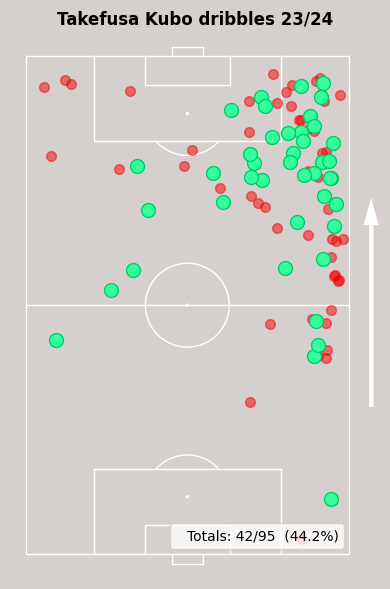

In [ ]:

count=0
pitch = VerticalPitch(pitch_color='#D5D0CD',line_color='white', pitch_type='opta',linewidth=1,goal_type='box')
fig, axs = pitch.draw(figsize=(12, 6))
plt.arrow(-7, 30, 0, 40, color='white', alpha=1.0,
          zorder=1, head_width=3, head_length=3.5, linewidth=3, length_includes_head=True)
plt.xlim([-10, 105])
plt.ylim([-5, 105])
plt.gca().invert_xaxis()
player = takeons["name"].unique()[0]
plt.title(f'{player} dribbles 23/24',loc='center', fontweight='bold',c='black')
count_s = 0
total = len(takeons)
fig.set_facecolor('#D5D0CD')


for index, row in takeons.iterrows():
      if row['outcome'] == 'Successful':
         count_s += 1
         plt.plot(row['y'], row['x'], 'o',color='#33FF9C',markersize=10,markeredgecolor="#00CC69",zorder=2)
      if row['outcome'] == 'Unsuccessful':
         plt.plot(row['y'], row['x'], 'o',color='#F40101',markersize=7,alpha=0.5,zorder=1)
percentage=(count_s/total)*100
legend_labels = [f'Totals: {count_s}/{total}  ({percentage:.1f}%)']
plt.legend(legend_labels,bbox_to_anchor=(0.92, 0.043), loc='lower right',handlelength=0, handleheight=0)


# Shooting player season

In [ ]:
cursor = conn.cursor()
player='Kirian Rodríguez'
cursor.execute(f"""
       SELECT match_event.*,players.name FROM match_event
          LEFT JOIN players ON match_event.player_id = players.player_id
          WHERE players.name = '{player}' AND match_event.is_shot = True
        """)
records = cursor.fetchall()

df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [ ]:
df.loc[df['type']=='Goal'].qualifiers

0     [{'type': {'value': 29, 'displayName': 'Assist...
12    [{'type': {'value': 103, 'displayName': 'GoalM...
15    [{'type': {'value': 72, 'displayName': 'LeftFo...
19    [{'type': {'value': 17, 'displayName': 'BoxCen...
21    [{'type': {'value': 20, 'displayName': 'RightF...
Name: qualifiers, dtype: object

Largo    14
Corto    11
Name: palo, dtype: int64

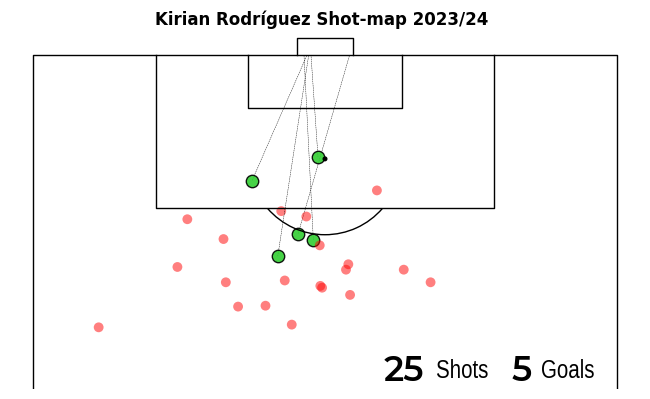

In [ ]:

pitch = VerticalPitch(pitch_type='opta', line_zorder=2, linewidth=1,
              pitch_color='white', line_color='black',half=True,goal_type= 'box',pad_bottom=-20)

count_g=0
fig, ax = pitch.draw(figsize=(6.6, 5))
fig.set_facecolor('white')

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/montserratalternates/MontserratAlternates-SemiBold.ttf' )

for index,row in df.iterrows():
  color_choice = 'red'
  size_c = 50
  alpha_c = 0.5
  edge_c = 'none'
  if row['type'] == 'Goal':
    count_g+=1
    color_choice = '#32CD32'
    size_c= 80
    alpha_c = 0.9
    edge_c = 'black'
    plt.plot([row['y'], row['goal_mouth_y']], [row['x'],100], color='black', linestyle='--', linewidth=0.3, zorder=1)

  plt.scatter(row['y'],row['x'],color = color_choice,s=size_c,edgecolor=edge_c,linewidth=1,alpha=alpha_c)

plt.title(f'{player} Shot-map 2023/24 ',loc='center', fontweight='bold')

plt.text(40, 65,f'{len(df)}', fontsize=25, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(31, 65,f'Shots ', fontsize=18, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(18, 65,f'{count_g}', fontsize=25, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(13, 65,f'Goals ', fontsize=18, ha='left', va='center',fontfamily="Liberation Sans Narrow")

df['palo'] = ""
for index,row in df.iterrows():
 if row.y<50:
  if row.goal_mouth_y<50:
    df.at[index,'palo'] = "Corto"
  else:
    df.at[index,'palo'] = "Largo"
 else:
  if row.goal_mouth_y<50:
    df.at[index,'palo'] = "Largo"
  else:
    df.at[index,'palo'] = "Corto"

df.palo.value_counts()

In [ ]:
df = df.reset_index()
def get_shot_form(qualifiers):
    for item in qualifiers:
        if 'type' in item and 'displayName' in item['type']:
            display_name = item['type']['displayName']
            if display_name in ['Head', 'RightFoot', 'LeftFoot']:
                return display_name
    return None  # Return None if no matching value is found

# Apply the function to create the 'shot_form' column
df['shot_form'] = df['qualifiers'].apply(get_shot_form)

In [ ]:
df['shot_form'].value_counts()

RightFoot    21
LeftFoot     13
Head         10
Name: shot_form, dtype: int64

In [ ]:
goals_df = df.loc[df['type']=='Goal']
goals_df['shot_form'].value_counts()

RightFoot    9
Head         5
LeftFoot     1
Name: shot_form, dtype: int64

Text(0.5, 1.0, 'Borja Mayoral Headers 2023/24 ')

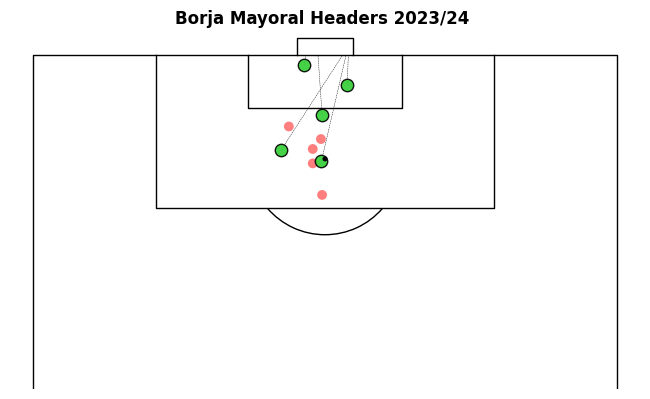

In [ ]:
df = df.loc[df['shot_form']=='Head']
pitch = VerticalPitch(pitch_type='opta', line_zorder=2, linewidth=1,
              pitch_color='white', line_color='black',half=True,goal_type= 'box',pad_bottom=-20)


fig, ax = pitch.draw(figsize=(6.6, 5))
fig.set_facecolor('white')
plt.gca().invert_xaxis()
for index,row in df.iterrows():
  color_choice = 'red'
  size_c = 50
  alpha_c = 0.5
  edge_c = 'none'
  if row['type'] == 'Goal':
    color_choice = '#32CD32'
    size_c= 80
    alpha_c = 0.9
    edge_c = 'black'
    plt.plot([row['y'], row['goal_mouth_y']], [row['x'],100], color='black', linestyle='--', linewidth=0.3, zorder=1)

  plt.scatter(row['y'],row['x'],color = color_choice,s=size_c,edgecolor=edge_c,linewidth=1,alpha=alpha_c)

plt.title(f'{player} Headers 2023/24 ',loc='center', fontweight='bold')



## Players shot tendency

In [ ]:
cursor = conn.cursor()
cursor.execute("""
       SELECT
            me.*,
            p.name
       FROM
            match_event me
       JOIN
            players p ON me.player_id = p.player_id
       WHERE
            me.is_shot = True;
        """)
records = cursor.fetchall()

df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [ ]:
df['palo'] = ""
is_penalty = lambda x: any(qualifier.get('type', {}).get('displayName') == 'Penalty' for qualifier in x)
df['is_penalty'] = df['qualifiers'].apply(is_penalty)
penalty_rows = df[df['is_penalty']]
df = df.loc[df['is_penalty'] == False]

for index,row in df.iterrows():
 if row.y<50:
  if row.goal_mouth_y<50:
    df.at[index,'palo'] = "Corto"
  else:
    df.at[index,'palo'] = "Largo"
 else:
  if row.goal_mouth_y<50:
    df.at[index,'palo'] = "Largo"
  else:
    df.at[index,'palo'] = "Corto"

df.palo.value_counts()

Corto    3264
Largo    2868
Name: palo, dtype: int64

In [ ]:
galis = df.loc[df['type']=='Goal']
galis.palo.value_counts()


Corto    308
Largo    295
Name: palo, dtype: int64

In [ ]:
def get_shot_form(qualifiers):
    for item in qualifiers:
        if 'type' in item and 'displayName' in item['type']:
            display_name = item['type']['displayName']
            if display_name in ['Head', 'RightFoot', 'LeftFoot']:
                return display_name
    return None
df['shot_form'] = df['qualifiers'].apply(get_shot_form)


goals_df = df.loc[df['type']=='Goal']

total_shots = df.groupby(['player_id', 'name']).size().reset_index(name='total_shots')
short_shots = df[df['palo'] == 'Corto'].groupby(['player_id']).size().reset_index(name='short_shots')
long_shots = df[df['palo'] == 'Largo'].groupby(['player_id']).size().reset_index(name='long_shots')
goals = df[df['type']=='Goal'].groupby(['player_id']).size().reset_index(name='goals')

#goal near_post / long post
short_goals = goals_df[goals_df['palo'] == 'Corto'].groupby(['player_id']).size().reset_index(name='Goals_near')
long_goals = goals_df[goals_df['palo'] == 'Largo'].groupby(['player_id']).size().reset_index(name='Goals_far')
left_goals=  goals_df[goals_df['shot_form'] == 'LeftFoot'].groupby(['player_id']).size().reset_index(name='LeftFoot_goals')
right_goals=  goals_df[goals_df['shot_form'] == 'RightFoot'].groupby(['player_id']).size().reset_index(name='RightFoot_goals')
head_goals=  goals_df[goals_df['shot_form'] == 'Head'].groupby(['player_id']).size().reset_index(name='Header_goals')

merged_counts = pd.merge(total_shots, short_shots, on='player_id', how='left').merge(long_shots, on='player_id', how='left').merge(goals, on='player_id', how='left').merge(short_goals, on='player_id', how='left').merge(long_goals,on='player_id',how='left').merge(left_goals,on='player_id',how='left').merge(right_goals,on='player_id',how='left').merge(head_goals,on='player_id',how='left')


merged_counts.fillna(0, inplace=True)
merged_counts['short_percentage'] = (merged_counts['short_shots'] / merged_counts['total_shots']) * 100
merged_counts['long_percentage'] = (merged_counts['long_shots'] / merged_counts['total_shots']) * 100


top_10_players = merged_counts.sort_values(by='total_shots', ascending=False).head(50)

top_10_players


,player_id,name,total_shots,short_shots,long_shots,goals,Goals_near,Goals_far,LeftFoot_goals,RightFoot_goals,Header_goals,short_percentage,long_percentage
17,29400,Robert Lewandowski,68,39.0,29.0,9.0,5.0,4.0,1.0,6.0,2.0,57.352941,42.647059
245,347862,Rodrygo,68,32.0,36.0,8.0,3.0,5.0,1.0,7.0,0.0,47.058824,52.941176
141,255182,Iñaki Williams,63,37.0,26.0,9.0,7.0,2.0,2.0,6.0,1.0,58.730159,41.269841
39,80241,Antoine Griezmann,57,39.0,18.0,8.0,5.0,3.0,5.0,1.0,2.0,68.421053,31.578947
64,98126,Ante Budimir,56,28.0,28.0,10.0,0.0,10.0,5.0,1.0,4.0,50.000000,50.000000
224,333048,Jørgen Strand Larsen,56,28.0,28.0,9.0,6.0,3.0,2.0,6.0,1.0,50.000000,50.000000
56,91242,Iago Aspas,54,21.0,33.0,3.0,2.0,1.0,3.0,0.0,0.0,38.888889,61.111111
275,367782,Mason Greenwood,54,26.0,28.0,3.0,2.0,1.0,2.0,1.0,0.0,48.148148,51.851852
63,97659,Gerard Moreno,53,29.0,24.0,8.0,4.0,4.0,5.0,3.0,0.0,54.716981,45.283019
55,91213,Álvaro Morata,51,26.0,25.0,13.0,4.0,9.0,3.0,6.0,4.0,50.980392,49.019608


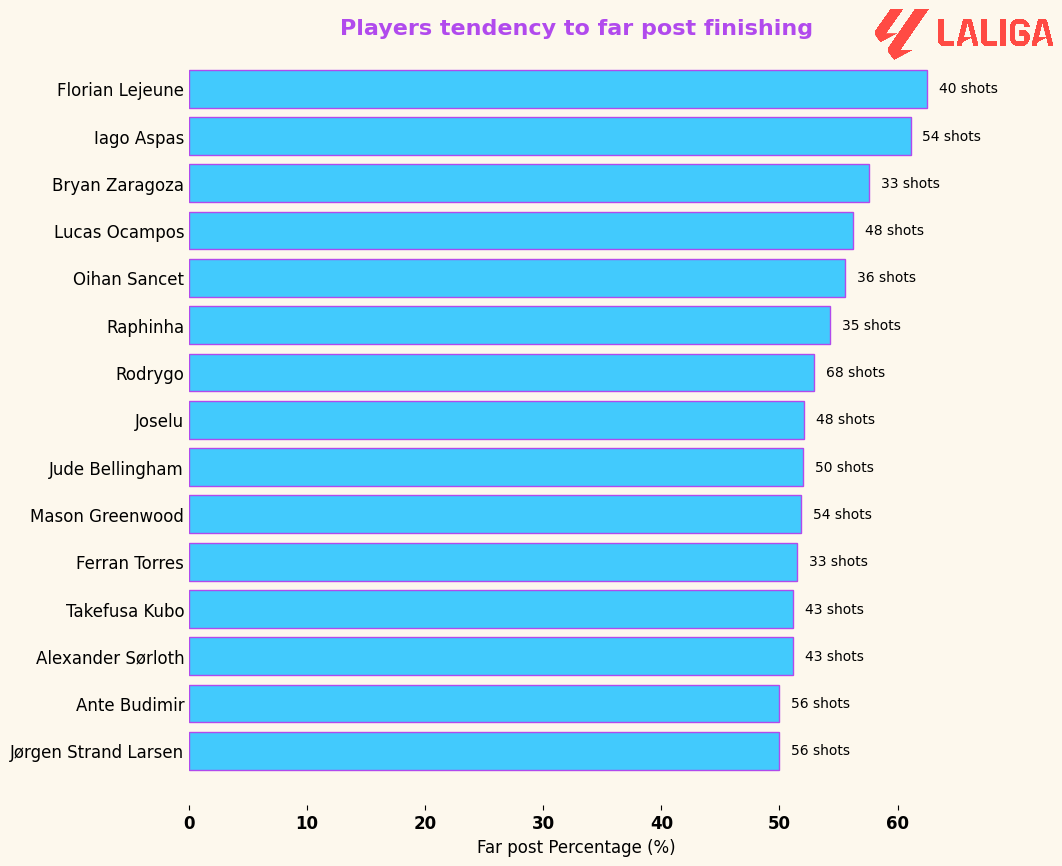

In [ ]:
top_10_players_sorted = top_10_players.sort_values(by='long_percentage', ascending=False)

top_10_players_sorted = top_10_players_sorted.head(15)

top_10_players_sorted = top_10_players_sorted.sort_values(by='long_percentage', ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))

img_path = '/content/drive/MyDrive/FootballAnalytics/LaLiga/laligalogo2.png'
img = plt.imread(img_path)
imagebox = OffsetImage(img, zoom=0.05)
ab = AnnotationBbox(imagebox, (1, 1), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)
ax.add_artist(ab)

fig.set_facecolor('#FDF8ED')
ax.set_facecolor('#FDF8ED')

bars = ax.barh(top_10_players_sorted['name'], top_10_players_sorted['long_percentage'],
               color='#42CAFD',edgecolor='#B14AED')
ax.set_xlabel('Far post Percentage (%)',fontsize=12)

ax.set_title('Players tendency to far post finishing',fontweight='bold',fontsize=16,color='#B14AED',loc='center',y=0.99)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(top_10_players_sorted['name'], fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold')
ax.tick_params(axis='y', which='both', length=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

for bar, total_shots in zip(bars, top_10_players_sorted['total_shots']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{total_shots} shots', ha='left', va='center')

plt.show()

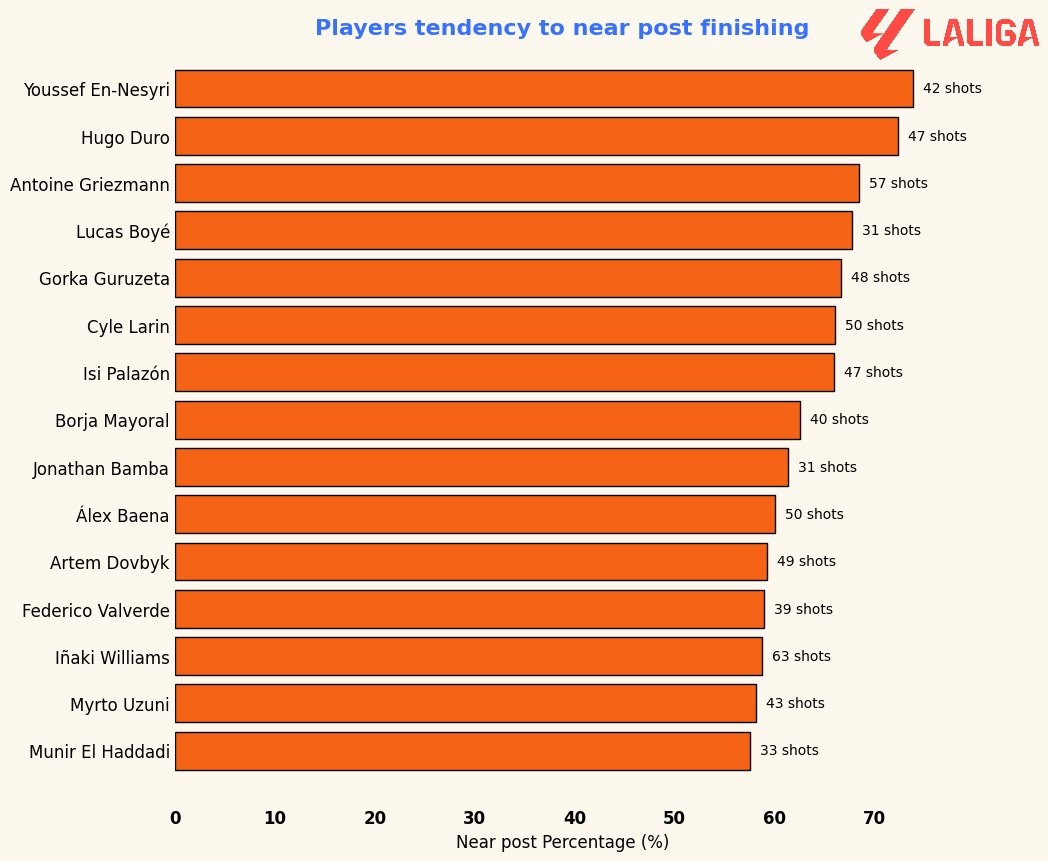

In [ ]:
top_10_players_sorted = top_10_players.sort_values(by='short_percentage', ascending=False)
top_10_players_sorted = top_10_players_sorted.head(15)
top_10_players_sorted = top_10_players_sorted.sort_values(by='short_percentage', ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))


img_path = '/content/drive/MyDrive/FootballAnalytics/LaLiga/laligalogo2.png'
img = plt.imread(img_path)
imagebox = OffsetImage(img, zoom=0.05)
ab = AnnotationBbox(imagebox, (1, 1), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)
ax.add_artist(ab)


bars = ax.barh(top_10_players_sorted['name'], top_10_players_sorted['short_percentage'],
               color='#F56416', edgecolor='black')
fig.set_facecolor('#FDF8ED')
ax.set_facecolor('#FDF8ED')
ax.set_xlabel('Near post Percentage (%)',fontsize=12)



ax.set_title('Players tendency to near post finishing',fontweight='bold',fontsize=16,color="#3772FF",y=0.99)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(top_10_players_sorted['name'], fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold')

ax.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

for bar, total_shots in zip(bars, top_10_players_sorted['total_shots']):
    ax.text(bar.get_width() + 1, bar.get_y() + bar.get_height() / 2, f'{total_shots} shots', ha='left', va='center')

plt.show()

## Top goalscorers tendencies

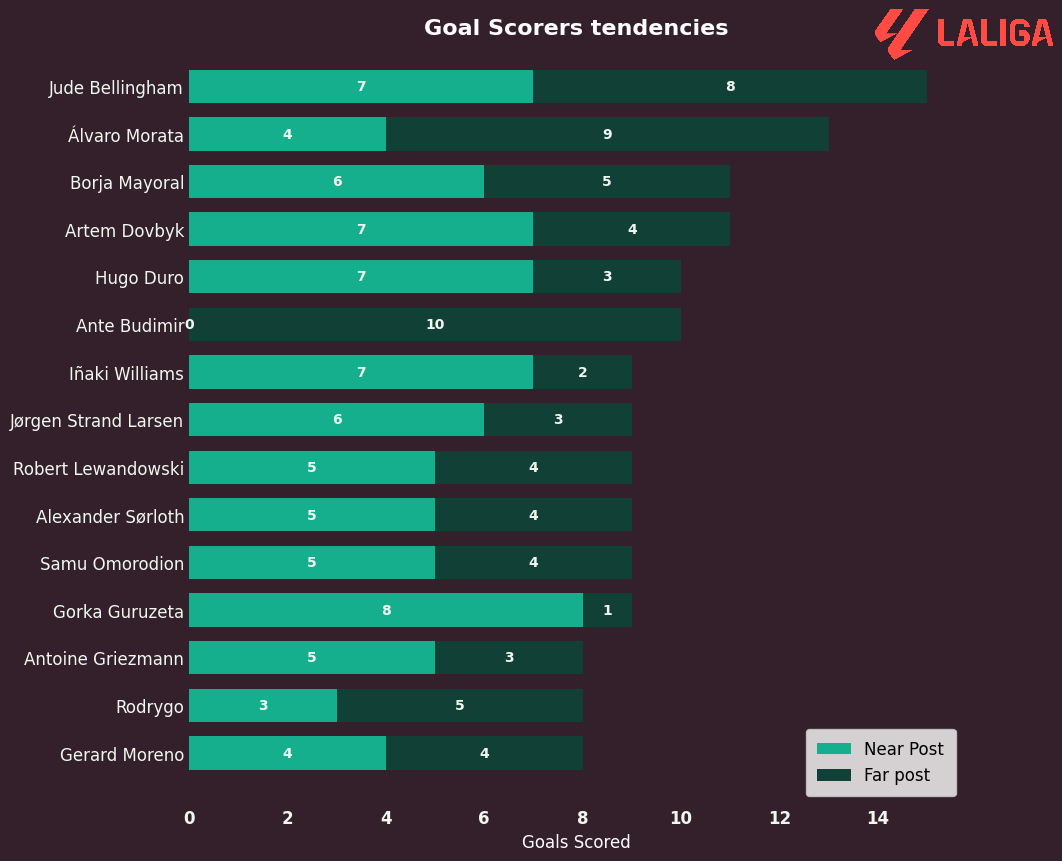

In [ ]:
top_10_players_sorted = top_10_players.sort_values(by='goals', ascending=False)
top_10_players_sorted['Goals_near'] = top_10_players_sorted['Goals_near'].astype(int)
top_10_players_sorted['Goals_far'] = top_10_players_sorted['Goals_far'].astype(int)
top_10_players_sorted = top_10_players_sorted.head(15)
top_10_players_sorted = top_10_players_sorted.sort_values(by='goals', ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))


img_path = '/content/drive/MyDrive/FootballAnalytics/LaLiga/laligalogo2.png'
img = plt.imread(img_path)
imagebox = OffsetImage(img, zoom=0.05)
ab = AnnotationBbox(imagebox, (1, 1), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)
ax.add_artist(ab)

bar_width = 0.7
bar_near = ax.barh(top_10_players_sorted['name'], top_10_players_sorted['Goals_near'], bar_width, label='Near Post',color="#16AF8E")
bar_far = ax.barh(top_10_players_sorted['name'], top_10_players_sorted['Goals_far'], bar_width, left=top_10_players_sorted['Goals_near'], label='Far post',color="#114036")

fig.set_facecolor('#33202A')
ax.set_facecolor('#33202A')

ax.set_xlabel('Goals Scored',fontsize=12,color='white')
ax.legend(fontsize=12,borderpad=0.7)

for player, goals_near, goals_far in zip(top_10_players_sorted['name'], top_10_players_sorted['Goals_near'], top_10_players_sorted['Goals_far']):
    ax.text(goals_near / 2, player, str(goals_near), ha='center', va='center', color='#F0F7EE', fontweight='bold')
    ax.text(goals_near + goals_far / 2, player, str(goals_far), ha='center', va='center', color='#F0F7EE', fontweight='bold')

ax.set_title('Goal Scorers tendencies',fontweight='bold',fontsize=16,color='white',y=0.99)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(top_10_players_sorted['name'], fontsize=12,color='#F0F7EE')
ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold',color='#F0F7EE')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

ax.tick_params(axis='both', which='both', length=0)



plt.show()

In [ ]:
cursor = conn.cursor()
cursor.execute("""
       SELECT
            me.*,
            p.name
       FROM
            match_event me
       JOIN
            players p ON me.player_id = p.player_id
       WHERE
            me.is_shot = True;
        """)
records = cursor.fetchall()

df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [ ]:
def get_shot_form(qualifiers):
    for item in qualifiers:
        if 'type' in item and 'displayName' in item['type']:
            display_name = item['type']['displayName']
            if display_name in ['Head', 'RightFoot', 'LeftFoot']:
                return display_name
    return None

df['shot_form'] = df['qualifiers'].apply(get_shot_form)

goals_df = df.loc[df['type']=='Goal']

total_shots = df.groupby(['player_id', 'name']).size().reset_index(name='total_shots')
goals = df[df['type']=='Goal'].groupby(['player_id']).size().reset_index(name='goals')

left_goals=  goals_df[goals_df['shot_form'] == 'LeftFoot'].groupby(['player_id']).size().reset_index(name='LeftFoot_goals')
right_goals=  goals_df[goals_df['shot_form'] == 'RightFoot'].groupby(['player_id']).size().reset_index(name='RightFoot_goals')
head_goals=  goals_df[goals_df['shot_form'] == 'Head'].groupby(['player_id']).size().reset_index(name='Header_goals')

merged_counts = pd.merge(total_shots, goals, on='player_id', how='left').merge(left_goals,on='player_id',how='left').merge(right_goals,on='player_id',how='left').merge(head_goals,on='player_id',how='left')


merged_counts.fillna(0, inplace=True)


top_10_players = merged_counts.sort_values(by='total_shots', ascending=False).head(50)

top_10_players.head()

,player_id,name,total_shots,goals,LeftFoot_goals,RightFoot_goals,Header_goals
17,29400,Robert Lewandowski,71,12.0,1.0,9.0,2.0
245,347862,Rodrygo,69,8.0,1.0,7.0,0.0
141,255182,Iñaki Williams,63,9.0,2.0,6.0,1.0
39,80241,Antoine Griezmann,60,11.0,8.0,1.0,2.0
64,98126,Ante Budimir,59,13.0,8.0,1.0,4.0


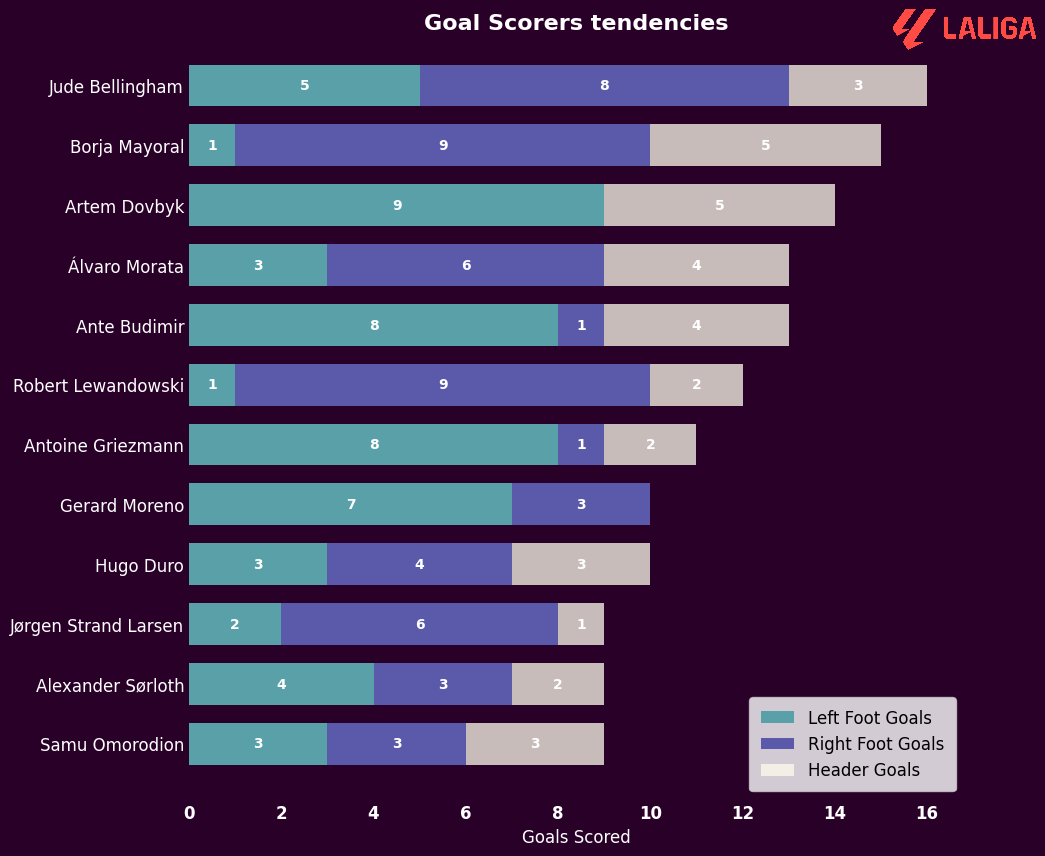

In [ ]:
top_10_players_sorted = top_10_players.sort_values(by='goals', ascending=False)
top_10_players_sorted['LeftFoot_goals'] = top_10_players_sorted['LeftFoot_goals'].astype(int)
top_10_players_sorted['RightFoot_goals'] = top_10_players_sorted['RightFoot_goals'].astype(int)
top_10_players_sorted['Header_goals'] = top_10_players_sorted['Header_goals'].astype(int)

top_10_players_sorted = top_10_players_sorted.head(12)
top_10_players_sorted = top_10_players_sorted.sort_values(by='goals', ascending=True)
fig, ax = plt.subplots(figsize=(10, 10))


img_path = '/content/drive/MyDrive/FootballAnalytics/LaLiga/laligalogo2.png'
img = plt.imread(img_path)
imagebox = OffsetImage(img, zoom=0.04)
ab = AnnotationBbox(imagebox, (1, 1), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)
ax.add_artist(ab)

bar_width = 0.7
bar_left = ax.barh(top_10_players_sorted['name'], top_10_players_sorted['LeftFoot_goals'], bar_width, label='Left Foot Goals',color="#59A0A9")
bar_right = ax.barh(top_10_players_sorted['name'], top_10_players_sorted['RightFoot_goals'], bar_width, left=top_10_players_sorted['LeftFoot_goals'], label='Right Foot Goals',color="#5B59A9")
bar_head = ax.barh(top_10_players_sorted['name'], top_10_players_sorted['Header_goals'], bar_width, left=top_10_players_sorted['RightFoot_goals']+top_10_players_sorted['LeftFoot_goals'], label='Header Goals',color="#FFFCEE",alpha=0.75)

fig.set_facecolor('#290028')
ax.set_facecolor('#290028')

ax.set_xlabel('Goals Scored',fontsize=12,color='white')
ax.legend(fontsize=12,borderpad=0.7)

for player, goals_left, goals_right, goals_head in zip(top_10_players_sorted['name'], top_10_players_sorted['LeftFoot_goals'], top_10_players_sorted['RightFoot_goals'], top_10_players_sorted['Header_goals']):
    if goals_left != 0:
        ax.text(goals_left / 2, player, str(goals_left), ha='center', va='center', color='white', fontweight='bold')
    if goals_right != 0:
        ax.text(goals_left + goals_right / 2, player, str(goals_right), ha='center', va='center', color='white', fontweight='bold')
    if goals_head != 0:
        ax.text(goals_left + goals_right + goals_head / 2, player, str(goals_head), ha='center', va='center', color='white', fontweight='bold')


ax.set_title('Goal Scorers tendencies',fontweight='bold',fontsize=16,color='white',y=0.99)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(top_10_players_sorted['name'], fontsize=12,color='white')
ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold',color='white')
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

ax.tick_params(axis='both', which='both', length=0)



plt.show()

## Penalties

In [ ]:
cursor = conn.cursor()
cursor.execute("""
       SELECT match_event.*,players.name,matches.home,matches.away FROM match_event
          LEFT JOIN players ON match_event.player_id = players.player_id
          LEFT JOIN matches ON match_event.match_id = matches.match_id
          WHERE players.name = 'Mikel Oyarzabal' AND match_event.is_shot = True
        """)
records = cursor.fetchall()

df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [ ]:
is_penalty = lambda x: any(qualifier.get('type', {}).get('displayName') == 'Penalty' for qualifier in x)
df['is_penalty'] = df['qualifiers'].apply(is_penalty)
penalty_rows = df[df['is_penalty']]

In [ ]:
df = df.loc[df['is_penalty'] == True]

In [ ]:
df.goal_mouth_z

8     3.2
20    6.3
Name: goal_mouth_z, dtype: float64

In [ ]:
df.goal_mouth_y

8     47.4
20    46.1
Name: goal_mouth_y, dtype: float64

In [ ]:
df

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,card_type,is_goal,type,outcome,period,match_id,name,home,away,is_penalty
8,2610580601,571,66,0.0,68,298839,88.5,50.0,None,None,...,False,True,Goal,Successful,SecondHalf,1734999,Mikel Oyarzabal,Rayo Vallecano,Real Sociedad,True
20,2594442619,585,60,40.0,68,298839,88.5,50.0,None,None,...,False,True,Goal,Successful,SecondHalf,1734713,Mikel Oyarzabal,Real Sociedad,Getafe,True


In [ ]:

df['goal_mouth_z'] = (df['goal_mouth_z']*2.4)/39.6
df['goal_mouth_y'] = ((df['goal_mouth_y'] - 45) / (55 - 45)) * (7.2 - 0) + 0

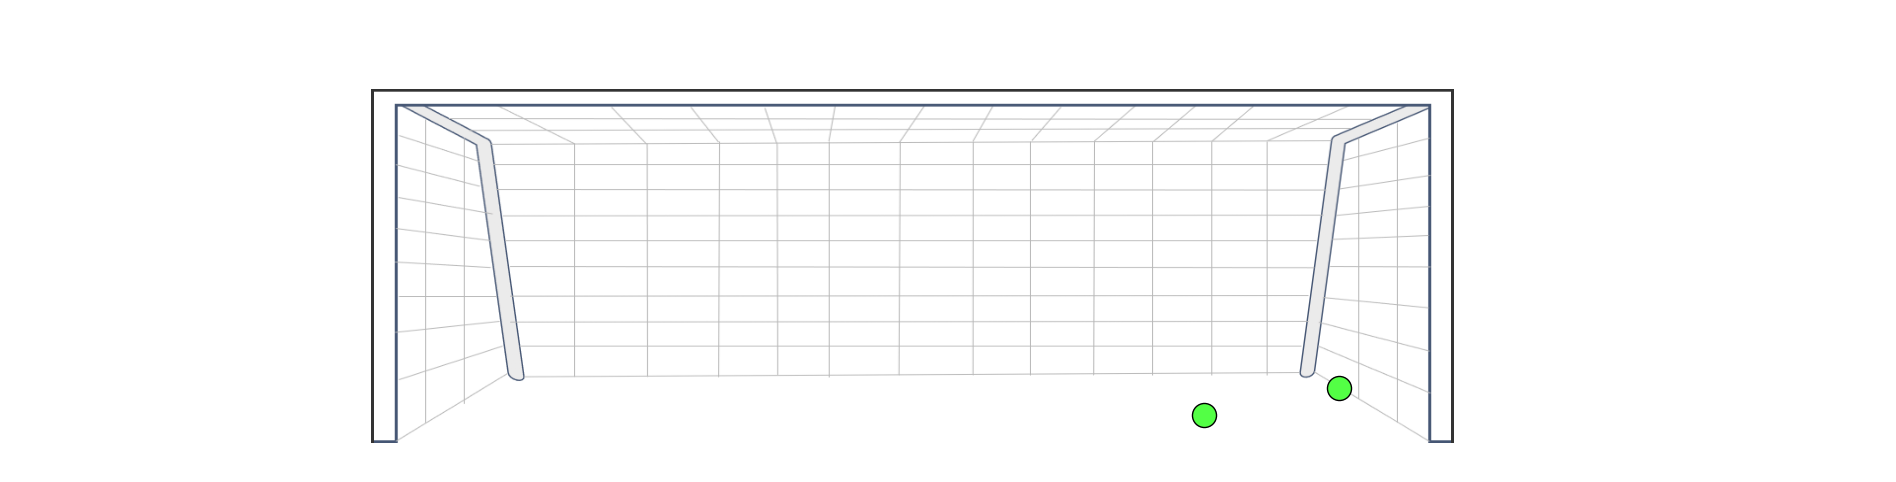

In [ ]:
from PIL import Image

# Load the image
image_path = '/content/drive/MyDrive/FootballAnalytics/LaLiga/porteria.png'
image = plt.imread(image_path)

x_min, x_max, y_min, y_max = 0, 7.5, 0, 2.45
fig, ax = plt.subplots(figsize=(32,6))

aspect_ratio = (x_max - x_min) / (y_max - y_min)
ax.imshow(image, extent=(x_min, x_max, y_min, y_max), aspect=aspect_ratio, alpha=0.8)


plt.gca().invert_xaxis()
for index,row in df.iterrows():
  color_shot = 'red'
  if row['type'] =='Goal':
    color_shot = '#53FF45'

  ax.scatter(row['goal_mouth_y'], row['goal_mouth_z'], marker='o', color=color_shot,s=300, label='Goals',edgecolor='black')

ax.set_xlim(10, -3)
ax.set_ylim(-0.2, 3)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal')

## Penalties - LaLiga season


In [ ]:
cursor = conn.cursor()
cursor.execute("""
       SELECT
            me.*,
            p.name,
            m.home,
            m.away
       FROM
            match_event me
       JOIN
            players p ON me.player_id = p.player_id
       JOIN
            matches m ON me.match_id = m.match_id
       WHERE
            me.is_shot = True;
        """)
records = cursor.fetchall()

df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [ ]:
is_penalty = lambda x: any(qualifier.get('type', {}).get('displayName') == 'Penalty' for qualifier in x)
df['is_penalty'] = df['qualifiers'].apply(is_penalty)
penalty_rows = df[df['is_penalty']]
df = df.loc[df['is_penalty'] == True]


In [ ]:
df['goal_mouth_z'] = (df['goal_mouth_z']*2.4)/39.6
df['goal_mouth_y'] = ((df['goal_mouth_y'] - 45) / (55 - 45)) * (7.2 - 0) + 0

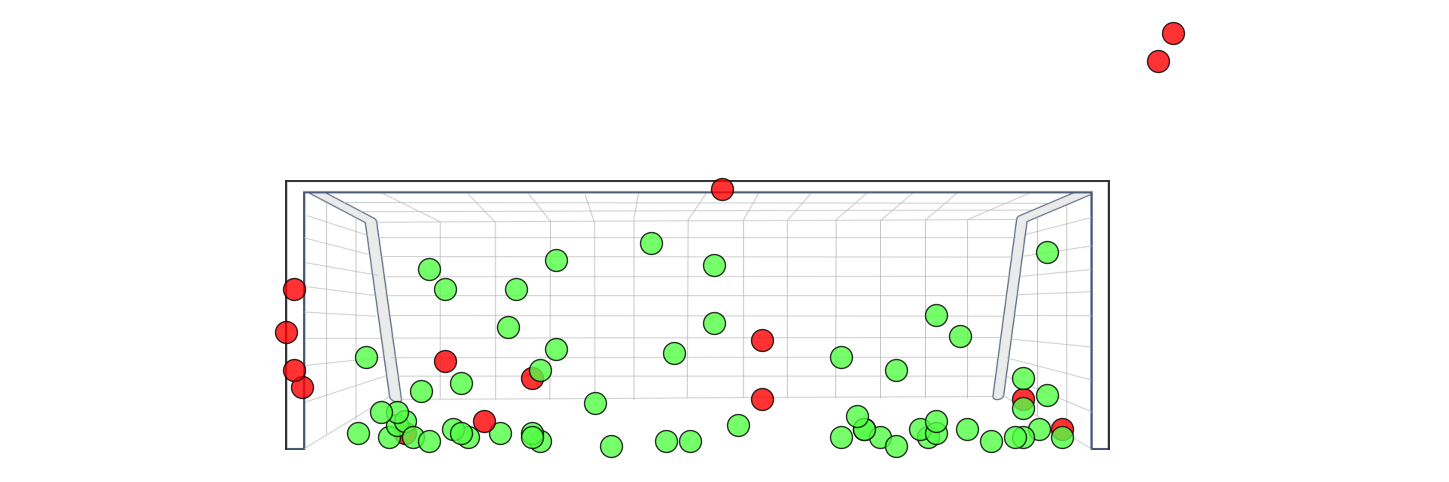

In [ ]:
from PIL import Image

# Load the image
image_path = '/content/drive/MyDrive/FootballAnalytics/LaLiga/porteria.png'
image = plt.imread(image_path)

x_min, x_max, y_min, y_max = 0, 7.5, 0, 2.45
fig, ax = plt.subplots(figsize=(32,6))

aspect_ratio = (x_max - x_min) / (y_max - y_min)
ax.imshow(image, extent=(x_min, x_max, y_min, y_max), aspect=aspect_ratio, alpha=0.8)


plt.gca().invert_xaxis()
for index,row in df.iterrows():
  color_shot = 'red'
  alpha=0.6
  if row['type'] =='Goal':
    color_shot = '#53FF45'
    alpha_c=0.8
  ax.scatter(row['goal_mouth_y'], row['goal_mouth_z'], marker='o', color=color_shot,s=250, label='Goals',alpha=alpha_c,edgecolor='black')

ax.set_xlim(10, -3)
ax.set_ylim(-0.2, 4)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)

ax.set_xticks([])
ax.set_yticks([])

ax.set_aspect('equal')

In [ ]:
# Define goal dimensions
goal_width = 7.32
goal_height = 2.44

# Create a new column to label each shot based on its width (left, mid, right)
df['width_zone'] = pd.cut(df['goal_mouth_y'], bins=[0, goal_width/3, 2*goal_width/3, goal_width], labels=['right', 'mid', 'left'])

# Create a new column to label each shot based on its height (top or bottom)
df['height_zone'] = pd.cut(df['goal_mouth_z'], bins=[0, goal_height/2, goal_height], labels=['bottom', 'top'])

# Create a combined shot zone column
df['shot_zone'] = df.apply(lambda row: f"{row['width_zone']}-{row['height_zone']}" if pd.notnull(row['width_zone']) and pd.notnull(row['height_zone']) else 'Out', axis=1)

# Print the percentage and number of shots for each area
shot_counts = df['shot_zone'].value_counts(normalize=True) * 100
shot_counts = shot_counts.sort_index()
print("Shot Zones:")
print(shot_counts)
print("\nNumber of Shots in Each Zone:")
print(df['shot_zone'].value_counts())



Shot Zones:
Out              8.219178
left-bottom     34.246575
left-top         5.479452
mid-bottom      15.068493
mid-top          4.109589
right-bottom    30.136986
right-top        2.739726
Name: shot_zone, dtype: float64

Number of Shots in Each Zone:
left-bottom     25
right-bottom    22
mid-bottom      11
Out              6
left-top         4
mid-top          3
right-top        2
Name: shot_zone, dtype: int64


In [ ]:
# Calculate the success rate for each shot zone
success_rate = df.groupby('shot_zone')['type'].apply(lambda x: (x == 'Goal').sum() / len(x) * 100 if len(x) > 0 else 0)

# Print the success rate for each shot zone
print("Success Rate for Each Shot Zone:")
print(success_rate)


Success Rate for Each Shot Zone:
shot_zone
Out               0.000000
left-bottom      84.000000
left-top        100.000000
mid-bottom       81.818182
mid-top          66.666667
right-bottom     90.909091
right-top       100.000000
Name: type, dtype: float64


In [ ]:
a=df.loc[df['type']=='Goal']
a[['name','goal_mouth_y','goal_mouth_z','home','away']]

,name,goal_mouth_y,goal_mouth_z,home,away
0,Gerard Moreno,5.832,0.115152,Granada,Villarreal
62,Artem Dovbyk,3.816,0.078788,Girona,Deportivo Alaves
253,Dani Parejo,5.472,1.115152,Villarreal,Celta Vigo
281,Dani Parejo,2.232,0.193939,Villarreal,Girona
314,Gerard Moreno,0.648,0.193939,Villarreal,Deportivo Alaves
325,Myrto Uzuni,6.768,0.842424,Granada,Mallorca
671,Luis Suárez,6.552,0.115152,Sevilla,Almeria
770,Mikel Vesga,2.448,0.115152,Athletic Club,Real Betis
794,Mikel Vesga,0.792,0.115152,Athletic Club,Real Betis
871,Mason Greenwood,1.656,0.115152,Real Betis,Getafe


In [ ]:
df.shot_zone.value_counts()

left-bottom     25
right-bottom    22
mid-bottom      11
Out              6
left-top         4
mid-top          3
right-top        2
Name: shot_zone, dtype: int64

In [ ]:
df.type.value_counts()

Goal           58
SavedShot       8
ShotOnPost      5
MissedShots     2
Name: type, dtype: int64

In [ ]:
b= df.loc[df['type']=='MissedShots']
b

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,outcome,period,match_id,name,home,away,is_penalty,width_zone,height_zone,shot_zone
4088,2613734291,383,45,39.0,60,281272,88.5,50.0,None,None,...,Successful,FirstHalf,1734658,Ianis Hagi,Deportivo Alaves,Almeria,True,NaN,NaN,Out
4483,2629458007,275,35,20.0,53,381510,88.5,50.0,None,None,...,Successful,FirstHalf,1734753,Oihan Sancet,Athletic Club,Atletico,True,NaN,NaN,Out


# Matches from teams

In [ ]:
cursor = conn.cursor()
cursor.execute("""
       SELECT * FROM matches
          ORDER BY match_date
        """)
records = cursor.fetchall()
matches_df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
matches_df['match_date'] = pd.to_datetime(matches_df['match_date'])


In [ ]:
# This dictionary points each team name (Team) to each corresponding crest image file (Crest). The crests are stored within a folder that will be point to later with that exact name
team_data = [
 {'Team': 'Alavés', 'Crest': 'Alaves.png', 'Color': '#0761AF'},
 {'Team': 'Almería', 'Crest': 'Almeria.png', 'Color': '#ee1119'},
 {'Team': 'Athletic Club', 'Crest': 'Athletic.png', 'Color': '#EE2523'},
 {'Team': 'Atletico', 'Crest': 'AtleticoMadrid.png', 'Color': '#CB3524'},
 {'Team': 'Barcelona', 'Crest': 'Barcelona.png', 'Color': '#A50044'},
 {'Team': 'Betis', 'Crest': 'Betis.png', 'Color': '#0BB363'},
 {'Team': 'Cádiz', 'Crest': 'Cadiz.png', 'Color': '#ffe500'},
 {'Team': 'Celta Vigo', 'Crest': 'Celta.png', 'Color': '#8AC3EE'},
 {'Team': 'Getafe', 'Crest': 'Getafe.png', 'Color': '#004fa3'},
 {'Team': 'Girona', 'Crest': 'Girona.png', 'Color': '#ff0000'},
 {'Team': 'Granada', 'Crest': 'Granada.png', 'Color': '#A61B2B'},
 {'Team': 'Las Palmas', 'Crest': 'LasPalmas.png', 'Color': '#c6da36'},
 {'Team': 'Mallorca', 'Crest': 'Mallorca.png', 'Color': '#E20613'},
 {'Team': 'Osasuna', 'Crest': 'Osasuna.png', 'Color': '#D91A21'},
 {'Team': 'Rayo Vallecano', 'Crest': 'RayoVallecano.png', 'Color': 'ff0000'},
 {'Team': 'Real Madrid', 'Crest': 'RealMadrid.png', 'Color': '#00529F'},
 {'Team': 'Real Sociedad', 'Crest': 'RealSociedad.png', 'Color': '#0067B1'},
 {'Team': 'Sevilla', 'Crest': 'Sevilla.png', 'Color': '#F43333'},
 {'Team': 'Valencia', 'Crest': 'Valencia.png', 'Color': '#D18816'},
 {'Team': 'Villarreal', 'Crest': 'Villareal.png', 'Color': '#FFE667'}
]

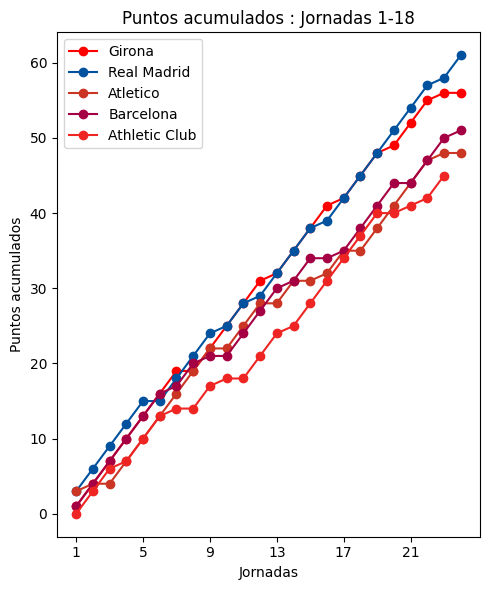

In [ ]:
equipos = ["Girona","Real Madrid", "Atletico","Barcelona", "Athletic Club"]

plt.figure(figsize=(5, 6))
for equipo_seleccionado in equipos:
  matches_df['puntos'] = matches_df.apply(lambda row: 3 if (row['home'] == equipo_seleccionado and row['goals_h'] > row['goals_a']) or
                                          (row['away'] == equipo_seleccionado and row['goals_a'] > row['goals_h'])
                            else 1 if (row['goals_h'] == row['goals_a'] and
                                      (row['home'] == equipo_seleccionado or row['away'] == equipo_seleccionado))
                            else 0, axis=1)

  df_equipo = matches_df[(matches_df['home'] == equipo_seleccionado) | (matches_df['away'] == equipo_seleccionado)].copy()

  df_equipo['puntos_acumulados'] = df_equipo['puntos'].cumsum()

  df_equipo['matches_formatted'] = df_equipo['match_date'].dt.strftime('%m/%d')
  df_equipo = df_equipo.reset_index(drop=True)
  df_equipo.index += 1
  color1 = next((item['Color'] for item in team_data if item['Team'] == equipo_seleccionado), None)
  plt.plot(df_equipo.index, df_equipo['puntos_acumulados'], marker='o',label=equipo_seleccionado,color = color1)

plt.title(f'Puntos acumulados : Jornadas 1-18')
plt.xlabel('Jornadas')
plt.ylabel('Puntos acumulados')
desired_xticks = 6
plt.xticks(df_equipo.index[::len(df_equipo) // (desired_xticks - 1)])
plt.grid(False)
plt.legend()
plt.tight_layout()


# Passes

## Construcción de equipo (pases)


In [ ]:
cursor = conn.cursor()
team='Athletic Club'
cursor.execute(f"""
       SELECT * FROM match_event
        LEFT JOIN teams ON match_event.team_id = teams.team_id
        WHERE teams.name = '{team}'
        """)
records = cursor.fetchall()

In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
df = df[df['type']=='Pass']

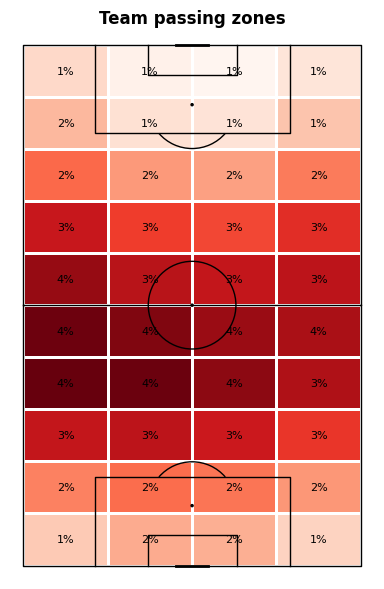

In [ ]:
pitch = VerticalPitch(pitch_type='opta', line_zorder=2,
              pitch_color='white', line_color='black',linewidth=1)

fig, ax = pitch.draw(figsize=(8, 6))
fig.set_facecolor('white')
plt.gca().invert_xaxis()
bin_statistic = pitch.bin_statistic(df.x, df.y, statistic='count', bins=(10, 4),normalize=True)
bin_statistic['statistic'] = gaussian_filter(bin_statistic['statistic'], 1)
pcm = pitch.heatmap(bin_statistic, ax=ax, cmap='Reds', edgecolors='white')
plt.title(f'Team passing zones',loc='center', fontweight='bold')

labels = pitch.label_heatmap(bin_statistic, color='black', fontsize=8,
                             ax=ax, ha='center', va='center',
                             str_format='{:.0%}')



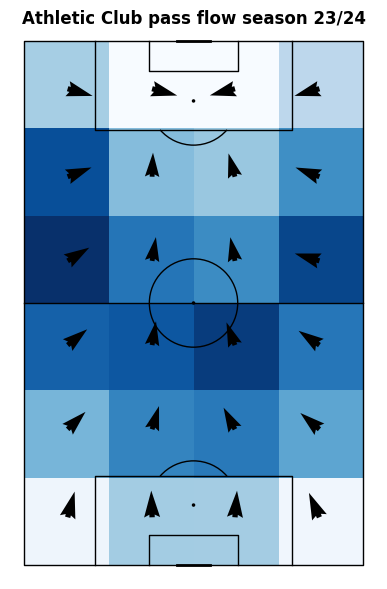

In [ ]:
pitch = VerticalPitch(pitch_type='opta', line_zorder=2,
              pitch_color='white', line_color='black',linewidth=1)
bins = (6, 4)
fig, ax = pitch.draw(figsize=(8, 6))
fig.set_facecolor('white')
plt.gca().invert_xaxis()
# plot the heatmap - darker colors = more passes originating from that square
bs_heatmap = pitch.bin_statistic(df.x, df.y, statistic='count', bins=bins)
hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')
# plot the pass flow map with a single color ('black') and length of the arrow (5)
fm = pitch.flow(df.x, df.y, df.end_x, df.end_y,
                color='black', arrow_type='same',
                arrow_length=5, bins=bins, ax=ax)
ax_title = ax.set_title(f'{team} pass flow season 23/24',pad=-20,color="black",fontweight='bold')

## Mapa pases jugador (season)

In [ ]:
cursor = conn.cursor()
player = 'Rodrigo De Paul'
cursor.execute(f"""
       SELECT * FROM match_event
        LEFT JOIN players ON match_event.player_id = players.player_id
        WHERE players.name = '{player}'
        """)
records = cursor.fetchall()



In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
df = df[df['type']=='Pass']

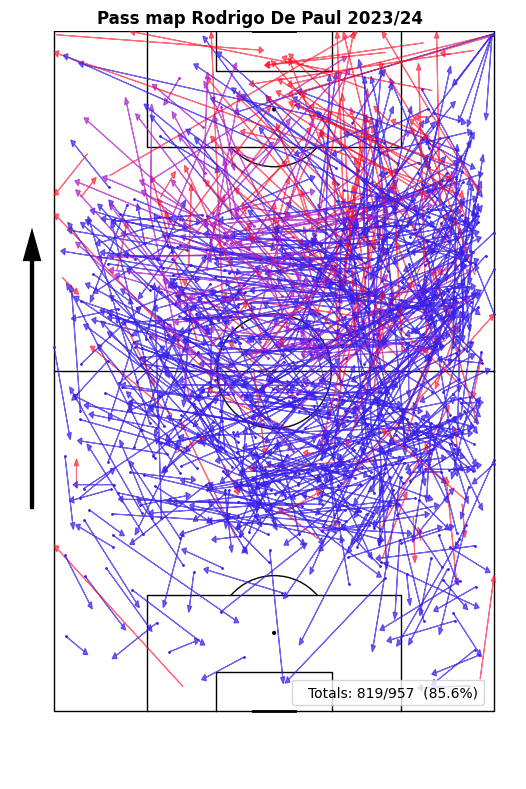

In [ ]:
count=0
data_player = df
pitch = VerticalPitch(pitch_color='white', line_color='black', pitch_type='opta',linewidth=1)
fig, axs = pitch.draw(figsize=(10, 8))
plt.arrow(105,30 , 0, 40, color='black', alpha=1.0,
          zorder=1, head_width=3, head_length=3.5, linewidth=3, length_includes_head=True)
plt.xlim([-5, 110])
plt.ylim([-10, 100])
plt.gca().invert_xaxis()
plt.title(f'Pass map {player} 2023/24 ',loc='center', fontweight='bold')
count_s = 0
total = len(data_player)
for index, row in data_player.iterrows():
    if row['outcome'] == 'Successful':
        count_s += 1
        color_choice = "#3820E9"
        if row['end_x']>row['y']+9.2 and row['y']>40:
            color_choice= "#AF21C7"   # Progressive pass
        plt.plot(row['y'], row['x'], 'o',color=color_choice,markersize=1)
        plt.arrow(row['y'], row['x'], row['end_y'] - row['y'], row['end_x'] - row['x'],
                color=color_choice, alpha=0.7, zorder=1,
                head_width=1, head_length=1, linewidth=0.8, length_includes_head=True)
    elif row['outcome'] == 'Unsuccessful':
            plt.arrow(row['y'], row['x'], row['end_y'] - row['y'], row['end_x'] - row['x'],
                  color='#FF0A23', alpha=0.6, zorder=1,
                  head_width=1, head_length=1, linewidth=0.8, length_includes_head=True)
percentage=(count_s/total)*100
legend_labels = [f'Totals: {count_s}/{total}  ({percentage:.1f}%)']
plt.legend(legend_labels,bbox_to_anchor=(0.95, 0.09), loc='lower right',handlelength=0, handleheight=0)


## Mapa pases jugador (partido)

In [ ]:
cursor = conn.cursor()
team0="Almeria"
team1="Atletico"
cursor.execute(f"""
    SELECT match_event.*, players.name AS player_name
    FROM match_event
    JOIN matches ON match_event.match_id = matches.match_id
    JOIN players ON match_event.player_id = players.player_id
    WHERE matches.home = '{team0}' AND matches.away = '{team1}'
""")
records = cursor.fetchall()


In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
player = 'Luka Romero'
df_pass = df[(df['type']=='Pass') & (df['player_name'] == player) ]
df_takeon = df[(df['type']=='TakeOn') & (df['player_name'] == player) ]
goal_indices = df[df['type'] == 'Goal'].index
assist_indexes = []
for goal_index in goal_indices:
    for i in range(goal_index, -1, -1):
        if df.at[i, 'type'] == 'Pass':
            assist_indexes.append(i)
            break
# Now, assist_indexes will contain the indices of the last pa

In [ ]:
assist_indexes

[78, 375, 901, 995]

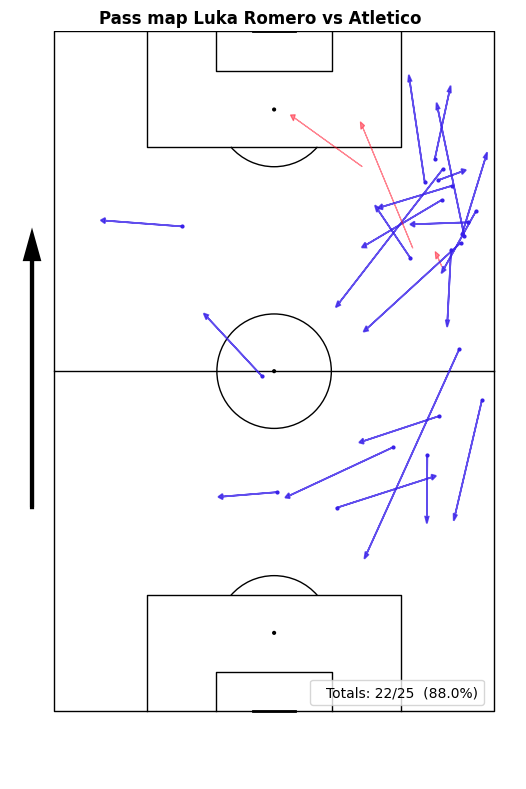

In [ ]:
count=0
data_player = df_pass
pitch = VerticalPitch(pitch_color='white', line_color='black', pitch_type='opta',linewidth=1)
fig, axs = pitch.draw(figsize=(10, 8))
plt.arrow(105,30 , 0, 40, color='black', alpha=1.0,
          zorder=1, head_width=3, head_length=3.5, linewidth=3, length_includes_head=True)
plt.xlim([-5, 110])
plt.ylim([-10, 100])
plt.gca().invert_xaxis()
plt.title(f'Pass map {player} vs {team1} ',loc='center', fontweight='bold')
count_s = 0
total = len(data_player)
for index, row in data_player.iterrows():
    if row['outcome'] == 'Successful':
        count_s += 1
        color_choice = "#3820E9"
        alpha_choice = 0.8
        if index in assist_indexes:
            color_choice= "#0AFF3B"   # Is Assist
            alpha_choice = 1
        plt.plot(row['y'], row['x'], 'o',color=color_choice,markersize=2)
        plt.arrow(row['y'], row['x'], row['end_y'] - row['y'], row['end_x'] - row['x'],
                color=color_choice, alpha= alpha_choice, zorder=1,
                head_width=0.8, head_length=1, linewidth=1.2, length_includes_head=True)
    elif row['outcome'] == 'Unsuccessful':
            plt.arrow(row['y'], row['x'], row['end_y'] - row['y'], row['end_x'] - row['x'],
                  color='#FF0A23', alpha=0.5, zorder=1,
                  head_width=1, head_length=1, linewidth=0.8, length_includes_head=True)
percentage=(count_s/total)*100
legend_labels = [f'Totals: {count_s}/{total}  ({percentage:.1f}%)']
plt.legend(legend_labels,bbox_to_anchor=(0.95, 0.09), loc='lower right',handlelength=0, handleheight=0)


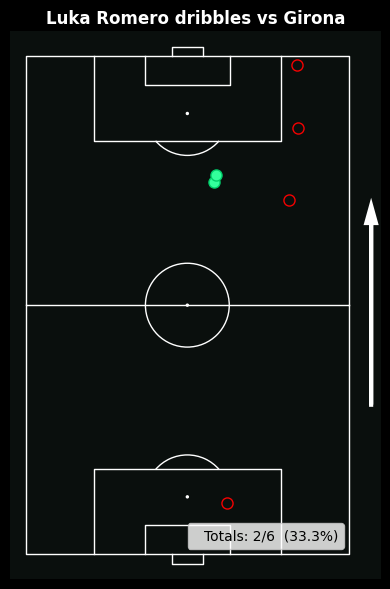

In [ ]:
count=0
pitch = VerticalPitch(pitch_color='#0A0F0D',line_color='white', pitch_type='opta',linewidth=1,goal_type='box')
fig, axs = pitch.draw(figsize=(12, 6))
plt.arrow(-7, 30, 0, 40, color='white', alpha=1.0,
          zorder=1, head_width=3, head_length=3.5, linewidth=3, length_includes_head=True)
plt.xlim([-10, 105])
plt.ylim([-5, 105])
plt.gca().invert_xaxis()

plt.title(f'{player} dribbles vs Girona',loc='center', fontweight='bold',c='white')
count_s = 0
total = len(df_takeon)
fig.set_facecolor('#000000')


for index, row in df_takeon.iterrows():
      if row['outcome'] == 'Successful':
         count_s += 1
         plt.plot(row['y'], row['x'], 'o',color='#33FF9C',markersize=8,markeredgecolor="#00CC69")
      if row['outcome'] == 'Unsuccessful':
         plt.plot(row['y'], row['x'], 'o',color='none',markersize=8,markeredgecolor="#F40101")
percentage=(count_s/total)*100
legend_labels = [f'Totals: {count_s}/{total}  ({percentage:.1f}%)']
plt.legend(legend_labels,bbox_to_anchor=(0.92, 0.043), loc='lower right',handlelength=0, handleheight=0)

## Pass networks (match)

In [ ]:
cursor = conn.cursor()
cursor.execute("""
    SELECT match_event.*, players.name AS player_name, teams.name AS team_name
    FROM match_event
    JOIN matches ON match_event.match_id = matches.match_id
    JOIN teams ON match_event.team_id = teams.team_id
    JOIN players ON match_event.player_id = players.player_id
    WHERE matches.home = 'Almeria' AND matches.away = 'Atletico'
""")
records = cursor.fetchall()


In [ ]:
df_network = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
df_network

passing_data = df_network[df_network['type']=="Pass"].reset_index()
unique_values = df_network['team_name'].unique()
team1, team2 = unique_values[0], unique_values[1]

pass_data_1 = passing_data[passing_data['team_name']==team1].reset_index()
pass_data_2 = passing_data[passing_data['team_name']==team2].reset_index()



In [ ]:
df_network

,id,event_id,minute,second,team_id,player_id,x,y,end_x,end_y,...,goal_mouth_y,is_shot,card_type,is_goal,type,outcome,period,match_id,player_name,team_name
0,2650544529,3,0,0.0,1799,91304,50.0,50.0,29.0,63.9,...,NaN,False,False,False,Pass,Successful,FirstHalf,1734890,Jonathan Viera,Almeria
1,2650544553,4,0,2.0,1799,403916,29.0,63.9,35.1,87.2,...,NaN,False,False,False,Pass,Successful,FirstHalf,1734890,Aleksandar Radovanovic,Almeria
2,2650544581,5,0,6.0,1799,390741,40.7,85.4,61.2,84.2,...,NaN,False,False,False,Pass,Successful,FirstHalf,1734890,Bruno Langa,Almeria
3,2650544585,6,0,7.0,1799,90003,63.8,86.5,65.5,86.7,...,NaN,False,False,False,Pass,Unsuccessful,FirstHalf,1734890,Anthony Lozano,Almeria
4,2650544573,3,0,7.0,63,77564,39.8,12.3,NaN,NaN,...,NaN,False,False,False,Interception,Successful,FirstHalf,1734890,Stefan Savic,Atletico
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1601,2650627413,976,94,55.0,63,91213,65.4,77.4,58.6,67.9,...,NaN,False,False,False,Pass,Successful,SecondHalf,1734890,Álvaro Morata,Atletico
1602,2650627435,977,94,56.0,63,112161,58.6,67.9,65.2,49.1,...,NaN,False,False,False,Pass,Successful,SecondHalf,1734890,Saúl Ñíguez,Atletico
1603,2650627461,978,94,59.0,63,382631,65.7,43.1,79.8,16.2,...,NaN,False,False,False,Pass,Successful,SecondHalf,1734890,Rodrigo Riquelme,Atletico
1604,2650627495,979,95,2.0,63,25191,86.2,12.1,90.3,89.1,...,NaN,False,False,False,Pass,Successful,SecondHalf,1734890,Axel Witsel,Atletico


In [ ]:
color1="red"
color2="blue"
def pass_network(df,minimum):
  team = df['team_name'][0]
  df['passer'] = df['player_name']
  df['recipient'] = df['player_name'].shift(-1)
  succesful = df[df['outcome']=='Successful']

  subs1 = df_network[df_network['team_name']==team]
  subs1 = subs1[subs1['type']=='SubstitutionOff']

  firstSub = subs1['minute']
  firstSub=firstSub.min()


  # passes between calculation
  succesful = succesful[succesful['minute']<firstSub]
  average_locations = succesful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
  average_locations.columns=['x','y','count']

  pass_between = succesful.groupby(['passer','recipient']).id.count().reset_index()
  pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

  pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
  pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['','_end'])

  pass_between = pass_between[pass_between['pass_count']>minimum]

  # plot the pitch
  pitch = VerticalPitch(pitch_color='#0A0F0D', line_color='white', pitch_type='opta',linewidth=1)
  fig, ax = pitch.draw(figsize=(10, 6))

  pitch.annotate(f"0-{firstSub} \'", xy=(96,50), c='white',zorder=2,
                    va='center', ha='center', size=10,ax=ax)
  # plot arrows and nodes
  arrows = pitch.arrows(pass_between.x,pass_between.y,pass_between.x_end,pass_between.y_end,
                        ax=ax, lw=(pass_between.pass_count / pass_between.pass_count.max()),
                        width=4,headwidth=4,color='#3CBBB1',zorder=1,alpha=.5)
  nodes = pitch.scatter(average_locations.x,average_locations.y,
                        ax=ax,
                        s=300, color=color1,edgecolors=color2,linewidth=1,zorder=1)

  average_locations.reset_index(inplace=True)
  for index, row in average_locations.iterrows():
     pitch.annotate(row.passer, xy=(row.x-4,row.y), c='white',zorder=2,
                    va='center', ha='center', size=9,ax=ax)

  # plot title
  plt.title(f'Pass network {team}',loc='center', fontweight='bold')

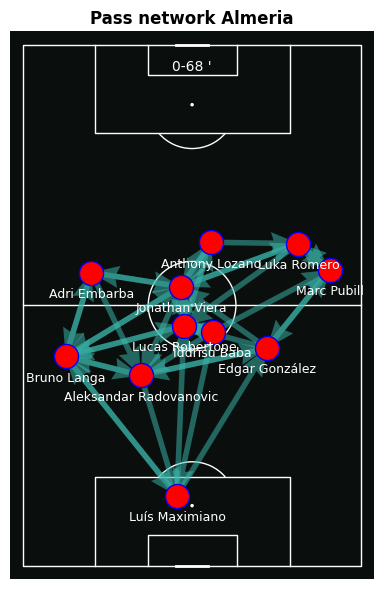

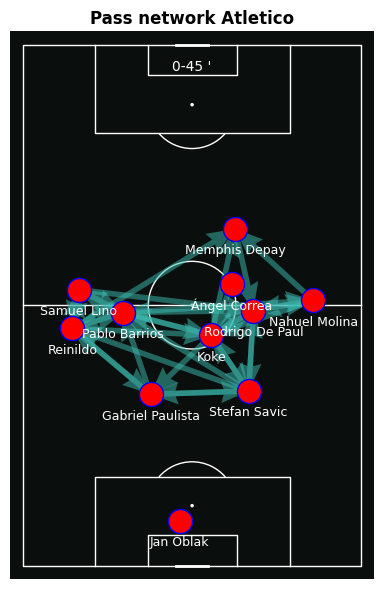

In [ ]:
pass_network(pass_data_1,2)
pass_network(pass_data_2,2)

## xThreat

In [ ]:
cursor = conn.cursor()
cursor.execute("""
    SELECT match_event.*, players.name AS player_name, teams.name AS team_name
    FROM match_event
    JOIN matches ON match_event.match_id = matches.match_id
    JOIN players ON match_event.player_id = players.player_id
    JOIN teams ON match_event.team_id = teams.team_id
    WHERE matches.home = 'Real Betis' AND matches.away = 'Athletic Club'
""")
records = cursor.fetchall()

In [ ]:
#Import xT Grid, turn it into an array, and then get how many rows and columns it has
#xT = pd.read_json("/content/drive/MyDrive/FootballAnalytics/xT_Kanun.json")
xT = pd.read_csv("/content/drive/MyDrive/FootballAnalytics/xT_Grid.csv")
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [ ]:
xT

array([[0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992, 0.04647721],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.00941056, 0.01082722, 0.01016549, 0.01132376, 0.01262646,
        0.01484598, 0.01689528, 0.0199707 , 0.02385149, 0.03511326,
        0.10805102, 0.25745362],
       [0.0088799 , 0.00977745, 0.01001304, 0.01110462, 0.01269174,
        0.01429128, 0.01685596, 0.01935132, 0.0241224 , 0.02855202,
        0.05491138, 0.06442595],
       [0.00750072, 0.00878589, 0.00942382, 0.0105949 , 0.01214719,
        0.0138454 , 0.01611813, 0.01870347, 0.02401521, 0.02953272,
        0.04066992,

In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
df_pass = df.loc[(df['type']=="Pass") & (df['outcome']=='Successful')].reset_index()
df_pass['x1_bin'] = pd.cut(df_pass['x'], bins=xT_cols, labels=False)
df_pass['y1_bin'] = pd.cut(df_pass['y'], bins=xT_rows, labels=False)
df_pass['x2_bin'] = pd.cut(df_pass['end_x'], bins=xT_cols, labels=False)
df_pass['y2_bin'] = pd.cut(df_pass['end_y'], bins=xT_rows, labels=False)


df_pass.head()

,index,id,event_id,minute,second,team_id,player_id,x,y,end_x,...,type,outcome,period,match_id,player_name,team_name,x1_bin,y1_bin,x2_bin,y2_bin
0,0,2651088313,3,0,0.0,54,77636,50.0,50.1,45.7,...,Pass,Successful,FirstHalf,1734916,Willian José,Real Betis,5,3,5,3
1,2,2651091007,23,2,19.0,53,56057,64.1,100.0,62.5,...,Pass,Successful,FirstHalf,1734916,Yuri Berchiche,Athletic Club,7,6,7,6
2,3,2651091121,24,2,21.0,53,408449,61.4,86.0,43.0,...,Pass,Successful,FirstHalf,1734916,Nico Williams,Athletic Club,7,6,5,5
3,4,2651091151,25,2,22.0,53,106586,43.4,73.0,52.4,...,Pass,Successful,FirstHalf,1734916,Íñigo Ruíz de Galarreta,Athletic Club,4,5,6,6
4,5,2651091195,26,2,24.0,53,56057,51.4,95.7,34.0,...,Pass,Successful,FirstHalf,1734916,Yuri Berchiche,Athletic Club,5,6,3,5


In [ ]:
df_pass['start_zone_value'] = df_pass[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
df_pass['end_zone_value'] = df_pass[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)

In [ ]:

# now we find the difference between the start and end to get the xT value
df_pass['xT'] = df_pass['end_zone_value'] - df_pass['start_zone_value']


In [ ]:
game_totals = df_pass.groupby('player_name').agg({'xT':['sum']})
game_totals.sort_values(by=('xT','sum'),ascending=False)

,xT
,sum
player_name,
Nabil Fekir,0.305468
Alex Berenguer,0.273759
Unai Simón,0.164497
Willian José,0.111902
Pablo Fornals,0.095259
Youssouf Sabaly,0.091716
Aitor Ruibal,0.083238
Imanol García de Albéniz,0.063763


In [ ]:

unique_values = df['team_name'].unique()
team1, team2 = unique_values[0], unique_values[1]

pass_data_1 = df[df['team_name']==team1].reset_index()
pass_data_2 = df[df['team_name']==team2].reset_index()

def pass_network(df,minimum,color1,color2):
  team = df['team_name'][0]
  df['passer'] = df['player_name']
  df['recipient'] = df['player_name'].shift(-1)

  team_against = str(unique_values[unique_values != team])
  team_against = team_against.strip("''[]")


  subs1 = df[df['team_name']==team]
  subs1 = subs1[subs1['type']=='SubstitutionOff']
  firstSub = subs1['minute']
  firstSub=firstSub.min()
  succesful = df[df['minute']<firstSub]
  average_locations = succesful.groupby('passer').agg({'x':['mean'],'y':['mean','count']})


  # x Threat summatory team (highest xT of the whole match)
  x_threat = df_pass[df_pass['team_name']==team]
  x_threat = x_threat.groupby('player_name').agg({'xT':['sum']})
  x_threat.columns=['sum']
  x_threat = x_threat.sort_values(by='sum',ascending=False)
  highest_xT = x_threat.iloc[0]

  highest_xT_name = highest_xT.name
  highest_xT_value = round(highest_xT['sum'],2)

  average_locations.columns=['x','y','count']
  average_locations = average_locations.sort_values(by='count', ascending=False)


  # Calculate highest nº of passes of the match
  passer_df =  df.groupby('passer').agg({'x':['mean'],'y':['mean','count']})
  passer_df.columns=['x','y','count']

  passer_df = passer_df.sort_values(by='count', ascending=False)

  highest_passer = passer_df.iloc[0]
  highest_passer_name = highest_passer.name
  highest_passer_passes = int(highest_passer['count'])

  # Pass between calculation
  pass_between = succesful.groupby(['passer','recipient']).id.count().reset_index()
  pass_between.rename({'id':'pass_count'},axis='columns',inplace=True)

  pass_between = pass_between.merge(average_locations, left_on='passer',right_index=True)
  pass_between = pass_between.merge(average_locations, left_on='recipient',right_index=True,suffixes=['','_end'])

  pass_between = pass_between[pass_between['pass_count']>minimum]


  # Plot the pitch
  pitch = VerticalPitch(pitch_color='#989FCE', line_color='white', pitch_type='opta',linewidth=0.5,goal_type='box')
  fig, ax = pitch.draw(figsize=(12, 6))
  fig.set_facecolor('#81523F')
  ax.set_facecolor('#81523F')
  pitch.annotate(f"0-{firstSub} \'", xy=(96,50), c='white',zorder=2,
                    va='center', ha='center', size=10,ax=ax)

  arrows = pitch.arrows(pass_between.x,pass_between.y,pass_between.x_end,pass_between.y_end,
                        ax=ax, lw=3,
                        width=3,headwidth=3,headlength=4,
                        color='#B2FFA9',zorder=1,alpha=(pass_between.pass_count / pass_between.pass_count.max()))

  x_threat = df_pass[(df_pass['team_name']==team) & (df_pass['minute']<firstSub)]
  x_threat = x_threat.groupby('player_name').agg({'xT':['sum']})
  x_threat.columns=['sum']

  nodes = pitch.scatter(average_locations.x,average_locations.y,
                        ax=ax,
                        s=200+(1000*x_threat['sum']), color=color1,edgecolors=color2,linewidth=1,zorder=1)

  plt.text(-15, 67,f'{highest_passer_name} ({highest_passer_passes})', fontsize=14, ha='left', va='center',color='white',fontfamily="Liberation Sans Narrow")
  plt.text(-15, 72,f'HIGHEST Nº OF PASSES: ', fontsize=14, ha='left', va='center',color='white',fontfamily="Liberation Sans Narrow")
  plt.text(-15, 50,f'{highest_xT_name} ({highest_xT_value})', fontsize=14, ha='left', va='center',color='white',fontproperties="Liberation Sans Narrow")
  plt.text(-15, 55,f'HIGHEST xT (via pass):', fontsize=14, ha='left', va='center',color='white',fontfamily="Liberation Sans Narrow")

  ax.set_xlim(105, -60)

  mSize = [0.05,0.20,0.6,0.8]
  mSizeS = [700 * i for i in mSize]
  mx = [-20,-25,-33,-43]
  my = [35,35,35,35]

  plt.scatter(mx, my, s=mSizeS, facecolors=color1, edgecolor=color2)
  arrow_x = -17  # X-coordinate for the arrow
  arrow_y = 30  # Y-coordinate for the arrow
  arrow = mpl.patches.FancyArrowPatch((arrow_x, arrow_y), (arrow_x-34, arrow_y), color='white',arrowstyle='-|>', mutation_scale=12, lw=1)
  plt.text(-30, 28, 'xT', va='center', fontfamily="Liberation Sans Narrow", fontsize=12,fontweight='bold',color='white')
  ax.add_patch(arrow)

  arrow = mpl.patches.FancyArrowPatch((-21, 15), (-30, 24), color='#B2FFA9',arrowstyle='-|>', mutation_scale=12, lw=4,alpha=0.2)
  ax.add_patch(arrow)
  arrow = mpl.patches.FancyArrowPatch((-30, 15), (-39, 24), color='#B2FFA9',arrowstyle='-|>', mutation_scale=12, lw=4,alpha=0.6)
  ax.add_patch(arrow)
  arrow = mpl.patches.FancyArrowPatch((-39, 15), (-48, 24), color='#B2FFA9',arrowstyle='-|>', mutation_scale=12, lw=4,alpha=1)
  ax.add_patch(arrow)

  arrow = mpl.patches.FancyArrowPatch((-17, 12), (-51, 12), color='white',arrowstyle='-|>', mutation_scale=12, lw=1,alpha=1)
  plt.text(-20, 10, 'Nº of passes', va='center', fontfamily="Liberation Sans Narrow", fontsize=12,fontweight='bold',color='white')
  ax.add_patch(arrow)

  # plot title
  plt.title(f'Pass network {team} against {team_against}',loc='center', fontweight='bold',color='white')
  plt.text(78, -5,f'*minimum 5 passes to be included', fontsize=12, ha='left', va='center',color='white',fontfamily="Liberation Sans Narrow")
  average_locations.reset_index(inplace=True)

  # plot player names
  for index, row in average_locations.iterrows():
    words = row.passer.split()
    if len(words)>1:
        first_letters = ''.join(word[0] for word in words[:-1])
        row.passer= f"{first_letters}.{words[-1]}"
    if row.x > np.mean(average_locations['x']):
     pitch.annotate(row.passer, xy=(row.x+4,row.y), c='white',zorder=4,
                    va='center', ha='center', size=9,ax=ax, fontweight= 'bold')
    else:
     pitch.annotate(row.passer, xy=(row.x-4,row.y), c='white',zorder=4,
                    va='center', ha='center', size=9,ax=ax, fontweight= 'bold')

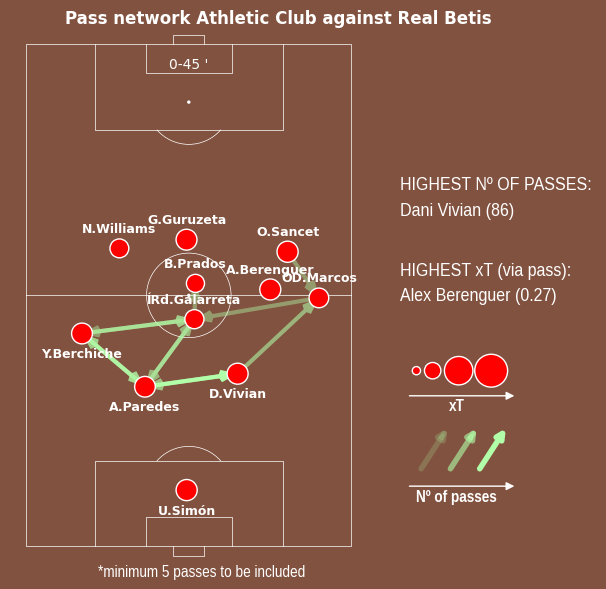

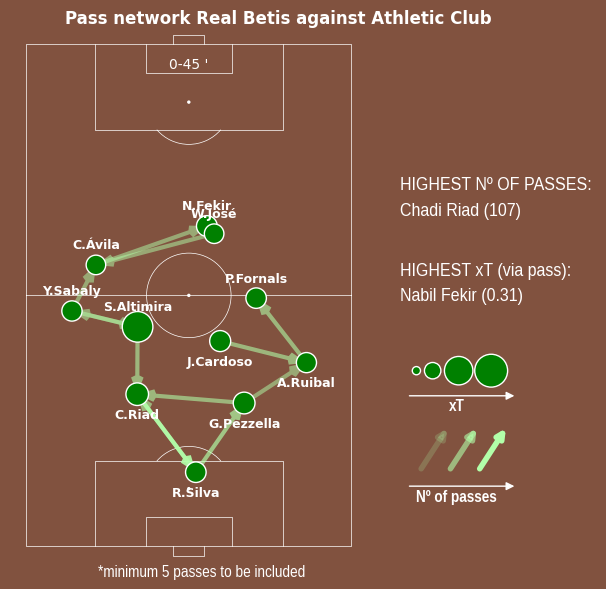

In [ ]:
pass_network(pass_data_2,5,"red","white")
pass_network(pass_data_1,5,"green","white")

## xThreat Pass League


In [ ]:
cursor = conn.cursor()
cursor.execute("""
    SELECT match_event.*, players.name AS player_name, teams.name AS team_name
    FROM match_event
    JOIN players ON match_event.player_id = players.player_id
    JOIN teams ON match_event.team_id = teams.team_id
    WHERE match_event.type = 'Pass'
""")
records = cursor.fetchall()

In [ ]:
#Import xT Grid, turn it into an array, and then get how many rows and columns it has
#xT = pd.read_json("/content/drive/MyDrive/FootballAnalytics/xT_Kanun.json")
xT = pd.read_csv("/content/drive/MyDrive/FootballAnalytics/xT_Grid.csv")
xT = np.array(xT)
xT_rows, xT_cols = xT.shape

In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
df_pass = df.loc[df['outcome']=='Successful'].reset_index()
df_pass['x1_bin'] = pd.cut(df_pass['x'], bins=xT_cols, labels=False)
df_pass['y1_bin'] = pd.cut(df_pass['y'], bins=xT_rows, labels=False)
df_pass['x2_bin'] = pd.cut(df_pass['end_x'], bins=xT_cols, labels=False)
df_pass['y2_bin'] = pd.cut(df_pass['end_y'], bins=xT_rows, labels=False)


df_pass.head()
df_pass['start_zone_value'] = df_pass[['x1_bin', 'y1_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)
df_pass['end_zone_value'] = df_pass[['x2_bin', 'y2_bin']].apply(lambda x: xT[x[1]][x[0]], axis=1)

# now we find the difference between the start and end to get the xT value
df_pass['xT'] = df_pass['end_zone_value'] - df_pass['start_zone_value']

In [ ]:
game_totals = df_pass.groupby(['player_name','team_name']).agg({'xT':['sum']})
game_totals.sort_values(by=('xT','sum'),ascending=False).head(50)

,,xT
,,sum
player_name,team_name,
Aleix García,Girona,7.865490
Toni Kroos,Real Madrid,7.381637
Álex Baena,Villarreal,7.080429
Iago Aspas,Celta Vigo,6.195180
Isco,Real Betis,6.129162
Óscar Mingueza,Celta Vigo,5.939906
Pepelu,Valencia,5.645668
Ivan Rakitic,Sevilla,5.581664


In [ ]:
game_totals = df_pass.groupby(['team_name', 'player_name']).agg({'xT': 'sum'})
max_xT_players = game_totals.loc[game_totals.groupby('team_name')['xT'].idxmax()]
top_players = max_xT_players.sort_values(by='xT', ascending=True)

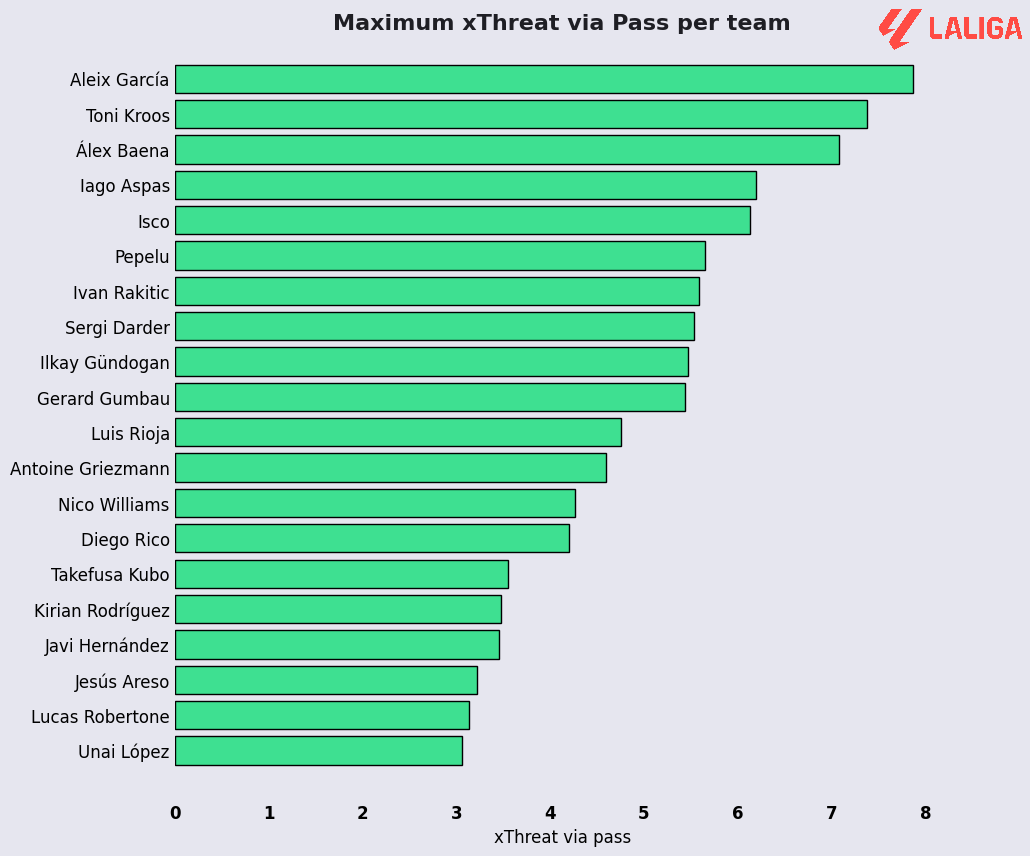

In [ ]:
fig, ax = plt.subplots(figsize=(10, 10))


img_path = '/content/drive/MyDrive/FootballAnalytics/LaLiga/laligalogo2.png'
img = plt.imread(img_path)
imagebox = OffsetImage(img, zoom=0.04)
ab = AnnotationBbox(imagebox, (1, 1), frameon=False, xycoords='axes fraction', boxcoords="axes fraction", pad=0)
ax.add_artist(ab)

bars = ax.barh(top_players.index.get_level_values('player_name'), top_players['xT'],
               color='#3EE091', edgecolor='black')
fig.set_facecolor('#E6E6EF')
ax.set_facecolor('#E6E6EF')
ax.set_xlabel('xThreat via pass',fontsize=12)

ax.set_title('Maximum xThreat via Pass per team',fontweight='bold',fontsize=16,color="#1E1E24",y=0.99)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

ax.set_yticklabels(top_players.index.get_level_values('player_name'), fontsize=12)
ax.set_xticklabels(ax.get_xticks(), fontsize=12, fontweight='bold')

ax.tick_params(axis='both', which='both', length=0)
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: int(x)))

plt.show()

## Progressive passes

In [ ]:
cursor = conn.cursor()
player = 'Íñigo Ruíz de Galarreta'
cursor.execute(f"""
       SELECT * FROM match_event
        LEFT JOIN players ON match_event.player_id = players.player_id
        WHERE players.name = '{player}'
        """)
records = cursor.fetchall()


In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
df = df.loc[df['type']=='Pass'].reset_index()
df.x = df.x*1.2
df.y = df.y*.8
df.end_x = df.end_x*1.2
df.end_y = df.end_y*0.8

df['beginning'] = np.sqrt(np.square(120-df['x']) + np.square(40 - df['y']))
df['end'] = np.sqrt(np.square(120 - df['end_x']) + np.square(40 - df['end_y']))

df['progressive'] = [(df['end'][x]) / (df['beginning'][x]) < .75 for x in range(len(df.beginning))]


In [ ]:
df.loc[df['progressive']==True].outcome

5        Successful
9        Successful
12     Unsuccessful
13       Successful
19     Unsuccessful
           ...     
816      Successful
818      Successful
821    Unsuccessful
822      Successful
823    Unsuccessful
Name: outcome, Length: 149, dtype: object

In [ ]:
df.x = df.x/1.2
df.y = df.y/.8
df.end_x = df.end_x/1.2
df.end_y = df.end_y/0.8
data_player = df.loc[df['progressive']==True]
data_player = data_player.loc[data_player['outcome']=='Successful']
len(data_player)

59

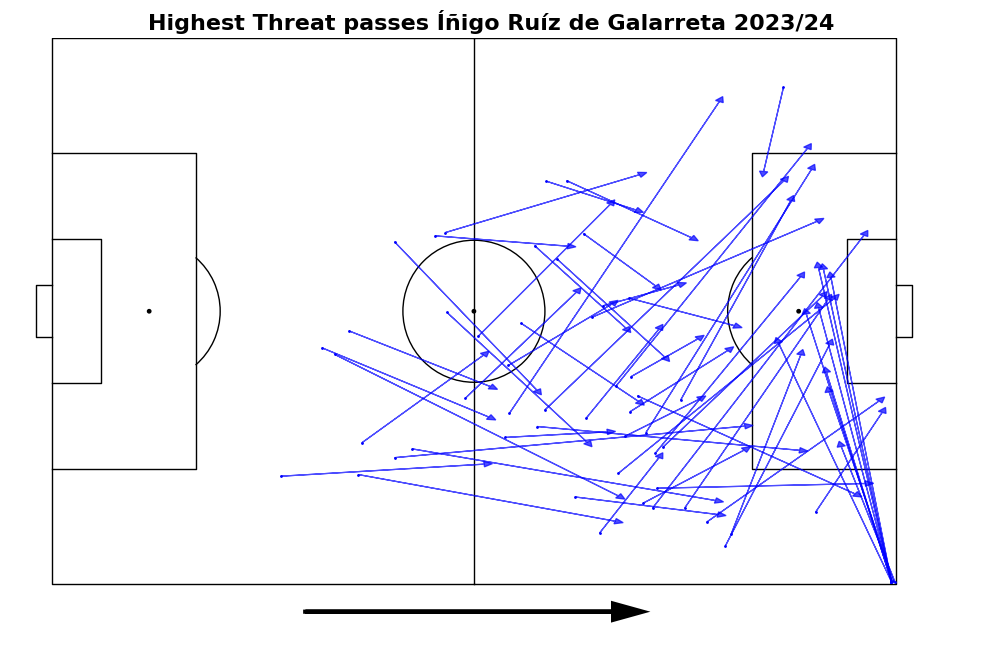

In [ ]:
count=0

pitch = Pitch(pitch_color='white', line_color='black', pitch_type='opta',goal_type='box',linewidth=1)
fig, axs = pitch.draw(figsize=(10, 8))
plt.arrow(30,-5 , 40, 0, color='black', alpha=1.0,
          zorder=1, head_width=3, head_length=3.5, linewidth=3, length_includes_head=True)
plt.xlim([-5, 110])
plt.ylim([-10, 100])

plt.title(f'Highest Threat passes {player} 2023/24 ',loc='center', fontweight='bold',fontsize=16)
count_s = 0
total = len(data_player)
for index, row in data_player.iterrows():
    if row['progressive'] == True:
      count_s += 1
      color_choice = "blue"
      plt.plot(row['x'], row['y'], 'o',color=color_choice,markersize=1)
      plt.arrow(row['x'], row['y'], row['end_x'] - row['x'], row['end_y'] - row['y'],
                color=color_choice, alpha=0.7, zorder=2,
                head_width=1, head_length=1, linewidth=0.9, length_includes_head=True)


#Play detector

In [ ]:
cursor = conn.cursor()
cursor.execute("""
    SELECT match_event.*, players.name AS player_name, players.shirt_no
    FROM match_event
    JOIN matches ON match_event.match_id = matches.match_id
    JOIN players ON match_event.player_id = players.player_id
    WHERE matches.home = 'Cadiz' AND matches.away = 'Valencia'
""")
records = cursor.fetchall()


OperationalError: server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.
server closed the connection unexpectedly
	This probably means the server terminated abnormally
	before or while processing the request.


In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
goal_indices = df[df['type'] == 'Goal'].index
goal_indices
#df.at[goal_indices[0], 'team_id']

Int64Index([49, 148, 548, 1130, 1332], dtype='int64')

In [ ]:
#df.loc[1348]

<ipython-input-39-1618f2e6116f>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(df.iloc[goal_index])
<ipython-input-39-1618f2e6116f>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(df.iloc[i])
<ipython-input-39-1618f2e6116f>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(df.iloc[i])
<ipython-input-39-1618f2e6116f>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(df.iloc[i])
<ipython-input-39-1618f2e6116f>:9: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inst

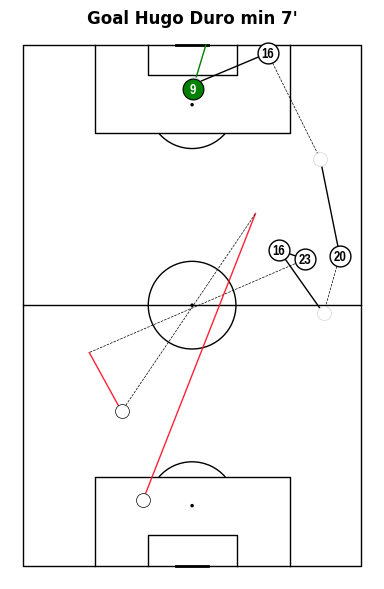

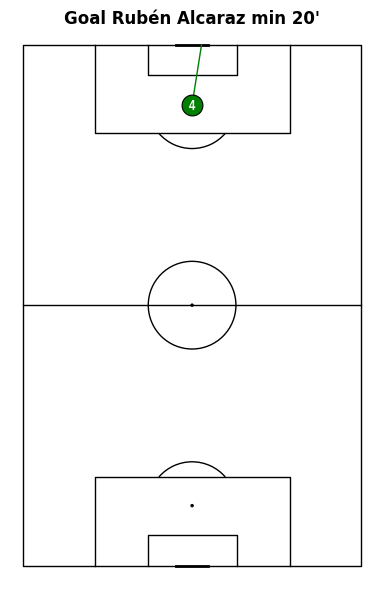

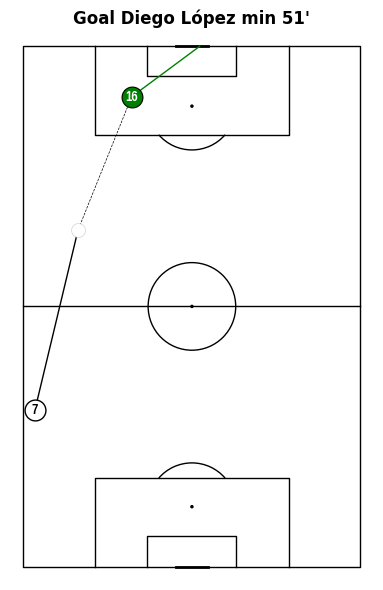

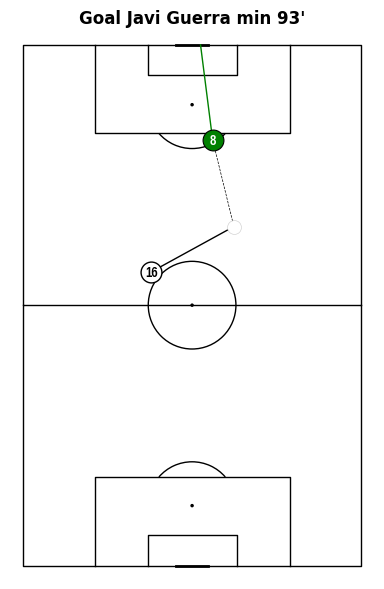

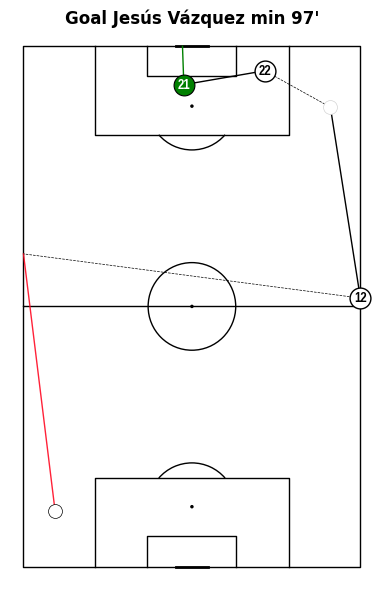

In [ ]:
 # DataFrame donde almacenarás las líneas relevantes
event_lim= 6
for goal_index in goal_indices:
    df_play = pd.DataFrame()
    team_id_goal = df.at[goal_index, 'team_id']
    df_play = df_play.append(df.iloc[goal_index])
    for i in range(goal_index, -1, -1):
        if df.at[i, 'type'] == 'Pass' or df.at[i, 'type'] == 'SavedShot' and df.at[i, 'team_id'] == team_id_goal:
            df_play = df_play.append(df.iloc[i])
            if len(df_play)>event_lim:
              break
        elif df.at[i, 'type'] == 'Save'   and df.at[i, 'team_id'] != team_id_goal:
            df_play = df_play.append(df.iloc[i])
        elif df.at[i, 'type'] == 'CornerAwarded' or df.at[i, 'type'] == 'Foul' or df.at[i, 'type'] == 'BallRecovery':
            break

    pitch = VerticalPitch(pitch_color='white', line_color='black', pitch_type='opta',linewidth=1)
    fig, ax = pitch.draw(figsize=(10, 6))

    previous_x= None
    previous_y= None

    # Ploteamos las líneas de la jugada
    for index, row in df_play.iterrows():
      if row['type'] == 'Pass':
        if row['outcome'] == 'Successful':
            color_choice = "black"
            alpha_choice = 0.8
            plt.plot([row['y'], row['end_y']], [row['x'], row['end_x']],
                     color='black', linestyle='-', linewidth=1, alpha=1, zorder=1)
            # Posición de pase
            plt.plot(row['y'], row['x'], 'o',color="white",markeredgecolor='black',markeredgewidth=1,markersize=15,zorder=2)
            plt.text(row['y'],row['x'], row['shirt_no'], va='center',ha='center',fontfamily="Liberation Sans Narrow", fontsize=10,fontweight='bold',zorder=2)

            # Movimiento de jugador
            plt.plot([previous_y, row['end_y']], [previous_x, row['end_x']],
                     color='black', linestyle='--', linewidth=0.5, alpha=1,zorder=1)

            # Pase recibido
            plt.plot(row['end_y'], row['end_x'], 'o',color="white",markeredgecolor='lightgrey',markeredgewidth=0.5,markersize=10,zorder=1)

            previous_x = row['x']
            previous_y = row['y']

        elif row['outcome'] == 'Unsuccessful':
                plt.plot([row['y'], row['end_y']], [row['x'], row['end_x']],
                     color='#FF0A23', linestyle='-', linewidth=1, alpha=0.9, zorder=1)
                plt.plot(row['y'], row['x'], 'o',color="white",markeredgecolor='black',markeredgewidth=0.5,markersize=10)

                plt.plot([previous_y, row['end_y']], [previous_x, row['end_x']],
                         color='black', linestyle='--', linewidth=0.5, alpha=1,zorder=1)
                previous_x = row['x']
                previous_y = row['y']

      elif row['type'] == 'Goal':
        if row['outcome'] == 'Successful':
          plt.plot(row['y'], row['x'], 'o',color="green",
                      markeredgecolor='black',markeredgewidth=0.8,markersize=15,zorder=2)
          plt.text(row['y'],row['x'], row['shirt_no'], va='center',ha='center', color='white',
                      fontfamily="Liberation Sans Narrow", fontsize=10,fontweight='bold',zorder=3)
          plt.plot([row['y'], row['goal_mouth_y']], [row['x'], 100],
                      color='green', linestyle='-', linewidth=1, alpha=1, zorder=1)
          plt.plot([previous_y, row['end_y']], [previous_x, row['end_x']],
                         color='black', linestyle='--', linewidth=0.5, alpha=1,zorder=1)
          previous_x = row['x']
          previous_y = row['y']
      elif row['type'] == 'SavedShot':
          plt.plot(row['y'], row['x'], 'o',color="white",
                      markeredgecolor='black',markeredgewidth=1,markersize=15,zorder=2)
          plt.text(row['y'],row['x'], row['shirt_no'], va='center',ha='center', color='black',
                      fontfamily="Liberation Sans Narrow", fontsize=10,fontweight='bold',zorder=3)
          plt.plot([row['y'], row['blocked_y']], [row['x'], row['blocked_x']],
                      color='lightblue', linestyle='-', linewidth=1, alpha=1, zorder=1)
          plt.plot(row['blocked_y'], row['blocked_x'], 'o',color="lightblue",
                      markeredgecolor='black',markeredgewidth=1,markersize=15,zorder=2)
          plt.text(row['blocked_y'],row['blocked_x'], "GK", va='center',ha='center', color='black',
                      fontfamily="Liberation Sans Narrow", fontsize=10,fontweight='bold',zorder=3)
          previous_x = row['x']
          previous_y = row['y']
    player_name = df_play['player_name'].iloc[0]
    min = df_play['minute'].iloc[0]

    plt.title(f'Goal {player_name} min {min}\'',loc='center', fontweight='bold')





# Defensive Performance

In [ ]:
cursor = conn.cursor()
player = 'Íñigo Ruíz de Galarreta'
cursor.execute(f"""
       SELECT * FROM match_event
        LEFT JOIN players ON match_event.player_id = players.player_id
        WHERE players.name = '{player}' AND match_event.type IN ('Clearence','BallRecovery','Aerial','Interception','Foul','Tackle','BlockedPass','Card','Challenge')
        """)
records = cursor.fetchall()



In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [ ]:
df.type.value_counts()

BallRecovery    103
Foul             65
Aerial           39
Tackle           34
Challenge        19
Interception      9
BlockedPass       8
Card              4
Name: type, dtype: int64

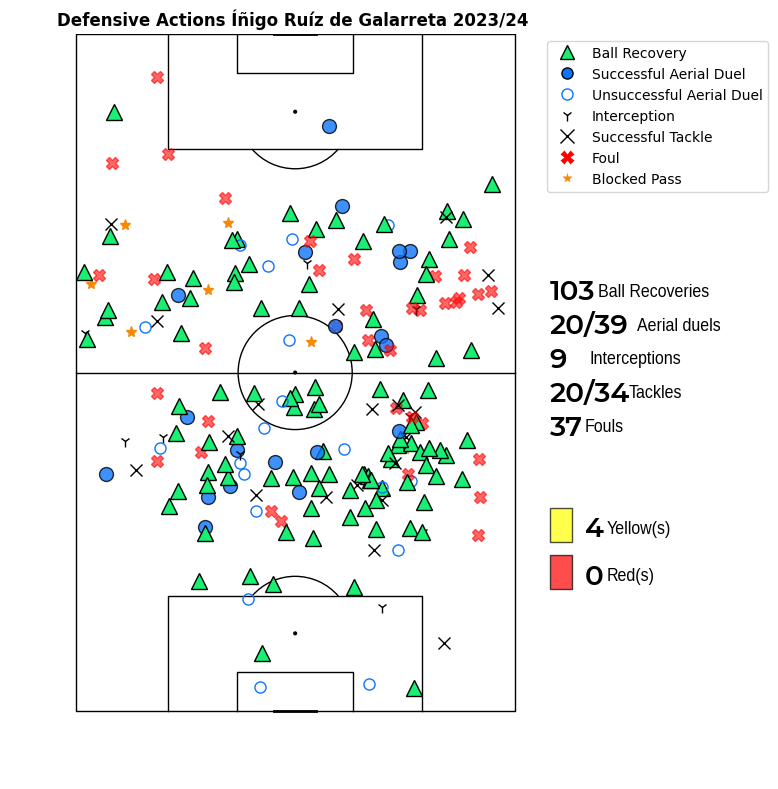

In [ ]:
data_player = df
pitch = VerticalPitch(pitch_color='white', line_color='black', pitch_type='opta',linewidth=1)
fig, axs = pitch.draw(figsize=(10, 8))

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/montserratalternates/MontserratAlternates-SemiBold.ttf' )

plt.xlim([-15, 115])
plt.ylim([-10, 100])
plt.gca().invert_xaxis()
plt.title(f'Defensive Actions {player} 2023/24 ',loc='center', fontweight='bold')
total = len(data_player)

count_br = 0
count_a = 0
count_i = 0
count_t = 0
count_f=0
count_c = 0
for index, row in data_player.iterrows():
    if row['type'] == 'BallRecovery':
       if row['outcome'] == 'Successful':
          count_br +=1
          plt.plot(row['y'], row['x'], '^',color="#19F073",markeredgecolor="black",linewidth=0.6,markersize=12)
    if row['type'] == 'Aerial':
       if row['outcome'] == 'Successful':
          count_a +=1
          plt.plot(row['y'], row['x'], 'o',color="#0D75FD",markeredgecolor="black",markersize=10,alpha=0.8)
       if row['outcome'] == 'Unsuccessful':
          plt.plot(row['y'], row['x'], 'o',color="none",markeredgecolor="#0D75FD",markersize=8)
    if row['type'] == 'Interception':
       if row['outcome'] == 'Successful':
          count_i +=1
          plt.plot(row['y'], row['x'], '1',color="black",markersize=8)
    if row['type'] == 'Tackle':
       if row['outcome'] == 'Successful':
          count_t +=1
          plt.plot(row['y'], row['x'], 'x',color="black",markersize=8)
    if row['type'] == 'Foul':
        if row['outcome'] == 'Unsuccessful':
          count_f +=1
          plt.plot(row['y'], row['x'], 'X',color="red",markersize=8,alpha=0.6)
    if row['type'] == 'BlockedPass':
       if row['outcome'] == 'Successful':
          count_c +=1
          plt.plot(row['y'], row['x'], '*',color="#F58A07",markersize=8)

total_a = len(data_player[data_player['type'] == 'Aerial'])
total_t = len(data_player[data_player['type'] == 'Tackle'])
plt.text(-8, 62,f'{count_br}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-19, 62,f'Ball Recoveries ', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 57,f'{count_a}/{total_a}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-28, 57,f'Aerial duels ', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 52,f'{count_i}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-17, 52,f'Interceptions', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 47,f'{count_t}/{total_t}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-26, 47,f'Tackles', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 42,f'{count_f}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-16, 42,f'Fouls', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")

# Rectangle for player with highest xG
yellow_df = data_player[data_player.apply(lambda row: row['type'] == 'Card' and any(qualifier.get('type', {}).get('displayName') in ['Yellow','SecondYellow'] for qualifier in row['qualifiers']), axis=1)]
red_df = data_player[data_player.apply(lambda row: row['type'] == 'Card' and any(qualifier.get('type', {}).get('displayName') in ['Red','SecondYellow'] for qualifier in row['qualifiers']), axis=1)]
yellows = len(yellow_df)
reds = len(red_df)

box = mpl.patches.Rectangle((-13, 25), 5, 5, linewidth=1, edgecolor='black', facecolor='yellow', alpha=0.7, capstyle='round',joinstyle='round')
box2 = mpl.patches.Rectangle((-13, 18), 5, 5, linewidth=1, edgecolor='black', facecolor='red', alpha=0.7, capstyle='round',joinstyle='round')
axs.add_patch(box)
axs.add_patch(box2)
plt.text(-16, 27,f'{yellows}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-21, 27,f'Yellow(s)', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-16, 20,f'{reds}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-21, 20,f'Red(s)', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")


legend_labels = ['Ball Recovery', 'Successful Aerial Duel', 'Unsuccessful Aerial Duel', 'Interception', 'Successful Tackle', 'Foul', 'Blocked Pass']
legend_handles = [
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='#19F073', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0D75FD', markersize=8, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='none', markersize=8, markeredgecolor='#0D75FD'),
    plt.Line2D([0], [0], marker='1', color='none', markerfacecolor='black', markersize=8),
    plt.Line2D([0], [0], marker='x', color="none", markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='X',  color='none',markerfacecolor='red', markersize=10,markeredgecolor='none'),
    plt.Line2D([0], [0], marker='*',  color='none',markerfacecolor='#F58A07', markersize=8,markeredgecolor='none')
]

# Place the legend outside the image
plt.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(0.93, 1))

# Show the plot

## Defensive Performance (match)


In [ ]:
cursor = conn.cursor()
team0="Sevilla"
team1="Atletico"
player = "Gabriel Paulista"
cursor.execute(f"""
       SELECT * FROM match_event
        LEFT JOIN players ON match_event.player_id = players.player_id
        LEFT JOIN matches ON match_event.match_id = matches.match_id
        WHERE players.name = '{player}' AND match_event.type IN ('Pass','Clearence','BallRecovery','Aerial','Interception','Foul','Tackle','BlockedPass','Card','Challenge')
        AND matches.home = '{team0}' AND matches.away = '{team1}'
        """)
records= cursor.fetchall()
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

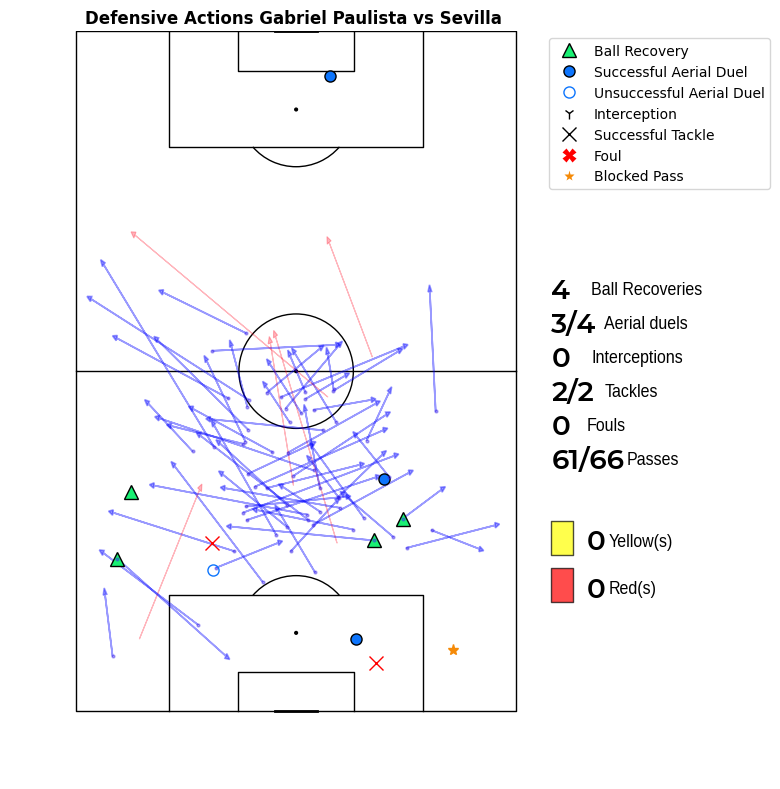

In [ ]:
data_player = df
pitch = VerticalPitch(pitch_color='white', line_color='black', pitch_type='opta',linewidth=1)
fig, axs = pitch.draw(figsize=(10, 8))

def make_html(fontname):
    return "<p>{font}: <span style='font-family:{font}; font-size: 24px;'>{font}</p>".format(font=fontname)

code = "\n".join([make_html(font) for font in sorted(set([f.name for f in matplotlib.font_manager.fontManager.ttflist]))])

fm_rubik = FontManager('https://raw.githubusercontent.com/google/fonts/main/ofl/montserratalternates/MontserratAlternates-SemiBold.ttf' )

plt.xlim([-15, 115])
plt.ylim([-10, 100])
plt.gca().invert_xaxis()
plt.title(f'Defensive Actions {player} vs {team0} ',loc='center', fontweight='bold')
total = len(data_player)

count_br = 0
count_a = 0
count_i = 0
count_t = 0
count_f=0
count_c = 0
count_p = 0
for index, row in data_player.iterrows():
    if row['type'] == 'BallRecovery':
       if row['outcome'] == 'Successful':
          count_br +=1
          plt.plot(row['y'], row['x'], '^',color="#19F073",markeredgecolor="black",markersize=10)
    if row['type'] == 'Aerial':
       if row['outcome'] == 'Successful':
          count_a +=1
          plt.plot(row['y'], row['x'], 'o',color="#0D75FD",markeredgecolor="black",markersize=8)
       if row['outcome'] == 'Unsuccessful':
          plt.plot(row['y'], row['x'], 'o',color="none",markeredgecolor="#0D75FD",markersize=8)
    if row['type'] == 'Interception':
       if row['outcome'] == 'Successful':
          count_i +=1
          plt.plot(row['y'], row['x'], '1',color="black",markersize=8)
    if row['type'] == 'Tackle':
       if row['outcome'] == 'Successful':
          count_t +=1
          plt.plot(row['y'], row['x'], 'x',color="red",markersize=10)
    if row['type'] == 'Foul':
        if row['outcome'] == 'Unsuccessful':
          count_f +=1
          plt.plot(row['y'], row['x'], 'X',color="red",markersize=10)
    if row['type'] == 'BlockedPass':
       if row['outcome'] == 'Successful':
          count_c +=1
          plt.plot(row['y'], row['x'], '*',color="#F58A07",markersize=8)
    if row['type'] == 'Pass':

       if row['outcome'] == 'Successful':
        count_p +=1
        color_choice = "#3820E9"
        alpha_choice = 0.8
        plt.plot(row['y'], row['x'], 'o',color=color_choice,markersize=2,alpha=0.4)
        plt.arrow(row['y'], row['x'], row['end_y'] - row['y'], row['end_x'] - row['x'],
                color="blue", alpha= 0.4, zorder=1,
                head_width=0.8, head_length=1, linewidth=1.2, length_includes_head=True)
       elif row['outcome'] == 'Unsuccessful':
         plt.arrow(row['y'], row['x'], row['end_y'] - row['y'], row['end_x'] - row['x'],
                  color='#FF0A23', alpha=0.3, zorder=1,
                  head_width=1, head_length=1, linewidth=0.8, length_includes_head=True)


total_a = len(data_player[data_player['type'] == 'Aerial'])
total_t = len(data_player[data_player['type'] == 'Tackle'])
total_p = len(data_player[data_player['type'] == 'Pass'])
plt.text(-8, 62,f'{count_br}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-17, 62,f'Ball Recoveries ', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 57,f'{count_a}/{total_a}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-20, 57,f'Aerial duels ', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 52,f'{count_i}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-17, 52,f'Interceptions', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 47,f'{count_t}/{total_t}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-20, 47,f'Tackles', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 42,f'{count_f}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-16, 42,f'Fouls', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-8, 37,f'{count_p}/{total_p}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-25, 37,f'Passes', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")

# Rectangle for player with highest xG
yellow_df = data_player[data_player.apply(lambda row: row['type'] == 'Card' and any(qualifier.get('type', {}).get('displayName') in ['Yellow','SecondYellow'] for qualifier in row['qualifiers']), axis=1)]
red_df = data_player[data_player.apply(lambda row: row['type'] == 'Card' and any(qualifier.get('type', {}).get('displayName') in ['Red','SecondYellow'] for qualifier in row['qualifiers']), axis=1)]
yellows = len(yellow_df)
reds = len(red_df)

box = mpl.patches.Rectangle((-13, 23), 5, 5, linewidth=1, edgecolor='black', facecolor='yellow', alpha=0.7, capstyle='round',joinstyle='round')
box2 = mpl.patches.Rectangle((-13, 16), 5, 5, linewidth=1, edgecolor='black', facecolor='red', alpha=0.7, capstyle='round',joinstyle='round')
axs.add_patch(box)
axs.add_patch(box2)
plt.text(-16, 25,f'{yellows}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-21, 25,f'Yellow(s)', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")
plt.text(-16, 18,f'{reds}', fontsize=20, ha='left', va='center',fontproperties=fm_rubik.prop)
plt.text(-21, 18,f'Red(s)', fontsize=14, ha='left', va='center',fontfamily="Liberation Sans Narrow")


legend_labels = ['Ball Recovery', 'Successful Aerial Duel', 'Unsuccessful Aerial Duel', 'Interception', 'Successful Tackle', 'Foul', 'Blocked Pass']
legend_handles = [
    plt.Line2D([0], [0], marker='^', color='w', markerfacecolor='#19F073', markersize=10, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='w', markerfacecolor='#0D75FD', markersize=8, markeredgecolor='black'),
    plt.Line2D([0], [0], marker='o', color='none', markersize=8, markeredgecolor='#0D75FD'),
    plt.Line2D([0], [0], marker='1', color='none', markerfacecolor='black', markersize=8),
    plt.Line2D([0], [0], marker='x', color="none", markerfacecolor='red', markersize=10),
    plt.Line2D([0], [0], marker='X',  color='none',markerfacecolor='red', markersize=10,markeredgecolor='none'),
    plt.Line2D([0], [0], marker='*',  color='none',markerfacecolor='#F58A07', markersize=8,markeredgecolor='none')
]

# Place the legend outside the image
plt.legend(legend_handles, legend_labels, loc='upper left', bbox_to_anchor=(0.93, 1))

# Show the plot

## Ball Recoveries per team & player


In [ ]:
cursor = conn.cursor()
team = "Deportivo Alaves"
cursor.execute(f"""
       SELECT match_event.*, players.name AS player_name, teams.name AS team_name FROM match_event
        LEFT JOIN teams ON match_event.team_id = teams.team_id
        LEFT JOIN players ON match_event.player_id = players.player_id
        WHERE teams.name = '{team}' AND match_event.type = 'BallRecovery'
        """)
records = cursor.fetchall()



In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])


In [ ]:
df.player_name.value_counts()

Ander Guevara          175
Antonio Blanco         115
Andoni Gorosabel       111
Luis Rioja             106
Jon Guridi              92
Rubén Duarte            82
Rafa Marín              78
Javi López              73
Abdel Abqar             73
Álex Sola               57
Aleksandar Sedlar       49
Carlos Benavídez        39
Samu Omorodion          38
Kike García             32
Abde Rebbach            28
Antonio Sivera          18
Ianis Hagi              16
Nahuel Tenaglia         16
Xeber Alkain            16
Carlos Vicente          14
Giuliano Simeone         4
Miguel de la Fuente      3
Jon Karrikaburu          2
Tomás Mendes             2
Mamadou Sylla            1
Name: player_name, dtype: int64

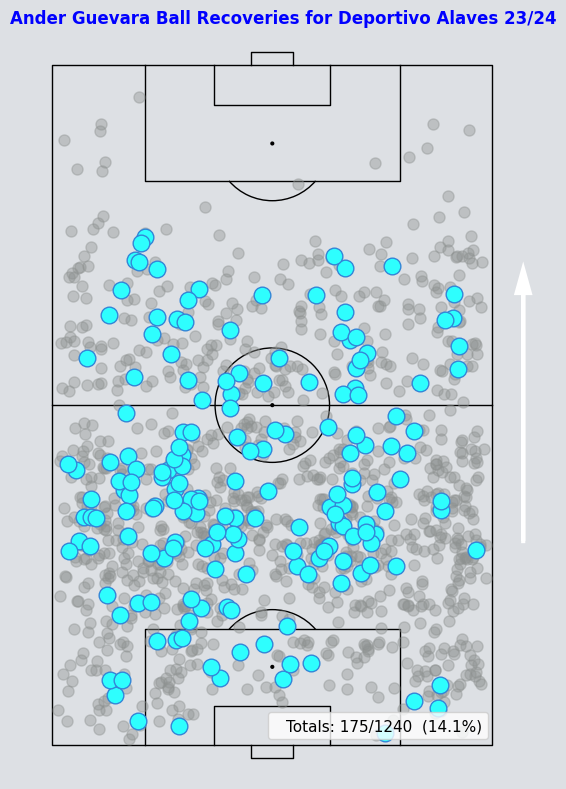

In [ ]:
player= "Ander Guevara"
count=0
pitch = VerticalPitch(pitch_color='#DDE0E4',line_color='black', pitch_type='opta',linewidth=1,goal_type='box')
fig, axs = pitch.draw(figsize=(10, 8))
plt.arrow(-7, 30, 0, 40, color='white', alpha=1.0,
          zorder=1, head_width=3, head_length=3.5, linewidth=3, length_includes_head=True)
plt.xlim([-10, 105])
plt.ylim([-5, 105])
plt.gca().invert_xaxis()

plt.title(f'{player} Ball Recoveries for {team} 23/24',loc='center', fontweight='bold',c='blue')
count_s = 0
total = len(df)
fig.set_facecolor('#DDE0E4')

for index, row in df.iterrows():
  if row['player_name'] == player:
    if row['outcome'] == 'Successful':
        count_s += 1
        plt.plot(row['y'], row['x'], 'o',markersize=12,color="#2EFEFE",alpha=1,markeredgecolor='#3385D7',zorder=2)
  else:
    if row['outcome'] == 'Successful':
        plt.plot(row['y'], row['x'], 'o',color='#8D9190',markersize=8,alpha=0.4,zorder=1)
percentage=(count_s/total)*100
legend_labels = [f'Totals: {count_s}/{total}  ({percentage:.1f}%)']
plt.legend(legend_labels,bbox_to_anchor=(0.92, 0.043), loc='lower right',handlelength=0, handleheight=0,fontsize=11)


# Goles jugador (temporada)

In [ ]:
cursor = conn.cursor()
player = 'Lamine Yamal'
cursor.execute(f"""
    SELECT match_event.*, players.name AS player_name, players.shirt_no
    FROM match_event
    JOIN players ON match_event.player_id = players.player_id
    WHERE match_id IN (
        SELECT match_id
        FROM match_event
        WHERE player_id = (
            SELECT player_id
            FROM players
            WHERE players.name = '{player}'
        ) AND type = 'Goal'
    )
""")
records = cursor.fetchall()


In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])
goal_indices = df[df['type'] == 'Goal'].index
goal_indices
#df.at[goal_indices[0], 'team_id']

Int64Index([464, 890, 1240, 1277, 1297, 1477, 1760, 2130, 2258, 2755], dtype='int64')

<ipython-input-35-5f03a66b4499>:6: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(df.iloc[goal_index])
<ipython-input-35-5f03a66b4499>:8: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(df.iloc[goal_index])
<ipython-input-35-5f03a66b4499>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(df.iloc[i])
<ipython-input-35-5f03a66b4499>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_play = df_play.append(df.iloc[i])
<ipython-input-35-5f03a66b4499>:11: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas

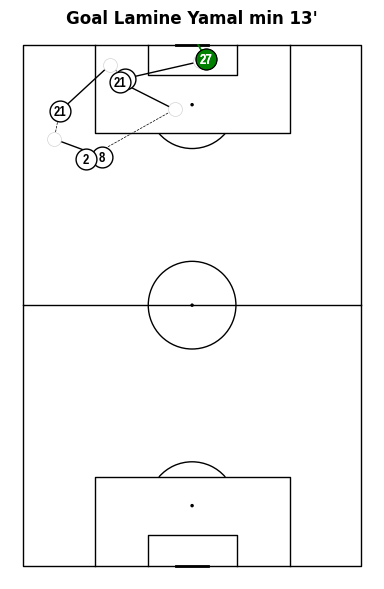

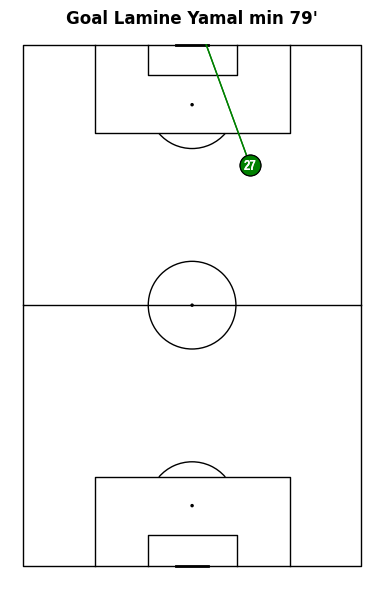

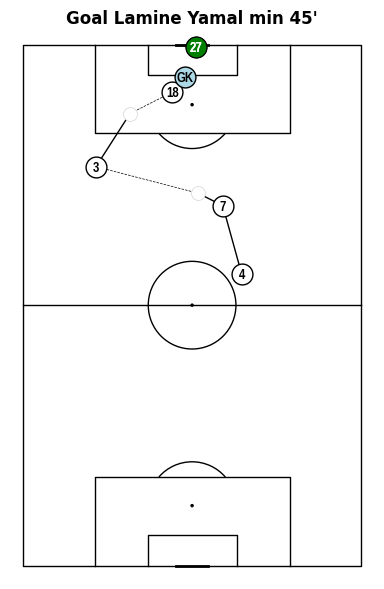

In [ ]:
 # DataFrame donde almacenarás las líneas relevantes
event_lim= 6
for goal_index in goal_indices:
    df_play = pd.DataFrame()
    team_id_goal = df.at[goal_index, 'team_id']
    df_play = df_play.append(df.iloc[goal_index])
    if df.iloc[goal_index]['player_name'] == player:
      df_play = df_play.append(df.iloc[goal_index])
      for i in range(goal_index, -1, -1):
          if df.at[i, 'type'] == 'Pass' or df.at[i, 'type'] == 'SavedShot' and df.at[i, 'team_id'] == team_id_goal:
              df_play = df_play.append(df.iloc[i])
              if len(df_play)>event_lim:
                break
          elif df.at[i, 'type'] == 'Save'   and df.at[i, 'team_id'] != team_id_goal:
              df_play = df_play.append(df.iloc[i])
          elif df.at[i, 'type'] == 'CornerAwarded' or df.at[i, 'type'] == 'Foul' or df.at[i, 'type'] == 'BallRecovery':
              break

      pitch = VerticalPitch(pitch_color='white', line_color='black', pitch_type='opta',linewidth=1)
      fig, ax = pitch.draw(figsize=(10, 6))

      previous_x= None
      previous_y= None

      # Ploteamos las líneas de la jugada
      for index, row in df_play.iterrows():
        if row['type'] == 'Pass':
          if row['outcome'] == 'Successful':

              color_choice = "black"
              alpha_choice = 0.8
              plt.plot([row['y'], row['end_y']], [row['x'], row['end_x']],
                      color='black', linestyle='-', linewidth=1, alpha=1, zorder=1)
              # Posición de pase
              plt.plot(row['y'], row['x'], 'o',color="white",markeredgecolor='black',markeredgewidth=1,markersize=15,zorder=2)
              plt.text(row['y'],row['x'], row['shirt_no'], va='center',ha='center',fontfamily="Liberation Sans Narrow", fontsize=10,fontweight='bold',zorder=2)

              # Movimiento de jugador
              plt.plot([previous_y, row['end_y']], [previous_x, row['end_x']],
                      color='black', linestyle='--', linewidth=0.5, alpha=1,zorder=1)

              # Pase recibido
              plt.plot(row['end_y'], row['end_x'], 'o',color="white",markeredgecolor='lightgrey',markeredgewidth=0.5,markersize=10,zorder=1)

              previous_x = row['x']
              previous_y = row['y']

          elif row['outcome'] == 'Unsuccessful':
                  plt.plot([row['y'], row['end_y']], [row['x'], row['end_x']],
                      color='#FF0A23', linestyle='-', linewidth=1, alpha=0.9, zorder=1)
                  plt.plot(row['y'], row['x'], 'o',color="white",markeredgecolor='black',markeredgewidth=0.5,markersize=10)

                  plt.plot([previous_y, row['end_y']], [previous_x, row['end_x']],
                          color='black', linestyle='--', linewidth=0.5, alpha=1,zorder=1)
                  previous_x = row['x']
                  previous_y = row['y']

        elif row['type'] == 'Goal':
          if row['outcome'] == 'Successful':
            plt.plot(row['y'], row['x'], 'o',color="green",
                        markeredgecolor='black',markeredgewidth=0.8,markersize=15,zorder=2)
            plt.text(row['y'],row['x'], row['shirt_no'], va='center',ha='center', color='white',
                        fontfamily="Liberation Sans Narrow", fontsize=10,fontweight='bold',zorder=3)
            plt.plot([row['y'], row['goal_mouth_y']], [row['x'], 100],
                        color='green', linestyle='-', linewidth=1, alpha=1, zorder=1)
            plt.plot([previous_y, row['end_y']], [previous_x, row['end_x']],
                          color='black', linestyle='--', linewidth=0.5, alpha=1,zorder=1)
            previous_x = row['x']
            previous_y = row['y']
        elif row['type'] == 'SavedShot':
            plt.plot(row['y'], row['x'], 'o',color="white",
                        markeredgecolor='black',markeredgewidth=1,markersize=15,zorder=2)
            plt.text(row['y'],row['x'], row['shirt_no'], va='center',ha='center', color='black',
                        fontfamily="Liberation Sans Narrow", fontsize=10,fontweight='bold',zorder=3)
            plt.plot([row['y'], row['blocked_y']], [row['x'], row['blocked_x']],
                        color='lightblue', linestyle='-', linewidth=1, alpha=1, zorder=1)
            plt.plot(row['blocked_y'], row['blocked_x'], 'o',color="lightblue",
                        markeredgecolor='black',markeredgewidth=1,markersize=15,zorder=2)
            plt.text(row['blocked_y'],row['blocked_x'], "GK", va='center',ha='center', color='black',
                        fontfamily="Liberation Sans Narrow", fontsize=10,fontweight='bold',zorder=3)
            previous_x = row['x']
            previous_y = row['y']
      player_name = df_play['player_name'].iloc[0]
      min = df_play['minute'].iloc[0]

      plt.title(f'Goal {player_name} min {min}\'',loc='center', fontweight='bold')



Goles ultimos minutos

In [ ]:
## Goles Celta en contra
cursor = conn.cursor()
team = 'Celta Vigo'
cursor.execute(f"""
    SELECT match_event.*,teams.name AS team_name, players.name AS player_name
    FROM match_event
    JOIN teams ON teams.team_id = match_event.team_id
    JOIN players ON players.player_id = match_event.player_id
    JOIN matches ON matches.match_id = match_event.match_id
    WHERE (matches.home = '{team}' OR matches.away = '{team}') AND type = 'Goal'
""")
records = cursor.fetchall()


In [ ]:
df = pd.DataFrame(records, columns = [desc[0] for desc in cursor.description])

In [ ]:
goals_against = df[df['team_name']!=team]

In [ ]:
goal_80min= goals_against[goals_against['minute']>80].reset_index()

In [ ]:
goal_80min.rename(columns={'team_name': 'Team', 'player_name': 'Player', 'minute': 'Minute'}, inplace=True)
goal_80min[['Team', 'Player','Minute']]

,Team,Player,Minute
0,Sevilla,Youssef En-Nesyri,83
1,Getafe,Jaime Mata,88
2,Mallorca,Vedat Muriqi,84
3,Athletic Club,Alex Berenguer,97
4,Barcelona,João Cancelo,88
5,Las Palmas,Jonathan Viera,83
6,Barcelona,Robert Lewandowski,84
7,Barcelona,Robert Lewandowski,96
8,Las Palmas,Marc Cardona,96
9,Girona,Yangel Herrera,90
